# Estatísticas do Jogos da plataforma Alite

  - This file is part of  program Alite.
  - Copyright © 2023  Carlo Oliveira <carlo@nce.ufrj.br>.
  - [Labase](http://labase.selfip.org) - [NCE](http://portal.nce.ufrj.br) - [UFRJ](http://www.ufrj.br).
  - SPDX-License-Identifier: ([GNU General Public License v3.0 or later](https://www.gnu.org/licenses/gpl-3.0-standalone.html)).

## Version and configurations.

 This module retrieves data and plot statistics for the [Alite - Games](https://games.alite.selfip.org).

## [23.07](https://github.com/labase/data_edu/releases)

### Added

- Review oposition deviation and transamb (6).
- Fix float conversion, Eica Valor and Ponto plots (18)

## [23.06](https://github.com/labase/data_edu/releases)

### Added

- Preliminary stats on Alite games data.
- Classe adicionada para plotar wisconsin (14).



## Recebe dados dos games de alite e converte para dataframe

In [65]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/players'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)

df_players = df
print(df)

                                     _id             name    ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')            admin   ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')            outro   ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')      Pedro Lomba   ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')           daniel   ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')         kduzinho   ano1  masculino   
..                                   ...              ...    ...        ...   
69  ObjectId('64a78b02b23753d1d92bcbef')  William Barbosa   ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa   ano6  masculino   
71  ObjectId('64ad5f32b23753d1d92bcbff')    labase anni 3  ano11   feminino   
72  ObjectId('64ad8285b23753d1d92bcc02')          Willian   ano6  masculino   
73  ObjectId('64ad8b55b23753d1d92bcc04')          Willian   ano6  masculino   

     idade                              time  \
0  

## Converte lista de dicionários numa lista de nomes dos jogos

In [66]:
dfg = [[g["game"] for g in t] for t in df.games]
# dfg = pd.DataFrame(dfg)
df['games_l'] = [[g["game"] for g in t] for t in df.games]
df

_id             name    ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')            admin   ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')            outro   ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')      Pedro Lomba   ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')           daniel   ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')         kduzinho   ano1  masculino   
..                                   ...              ...    ...        ...   
69  ObjectId('64a78b02b23753d1d92bcbef')  William Barbosa   ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa   ano6  masculino   
71  ObjectId('64ad5f32b23753d1d92bcbff')    labase anni 3  ano11   feminino   
72  ObjectId('64ad8285b23753d1d92bcc02')          Willian   ano6  masculino   
73  ObjectId('64ad8b55b23753d1d92bcc04')          Willian   ano6  masculino   

     idade                              time  \
0   anos10  2023-05-31 19:45:52.561244-03:00   
1    anos9  2023-05-31 19:50:01.899904-03:00   
2   anos10  2023-06-03 15:01:44.637563-03:00   
3   anos10  2023-06-03 15:27:05.449207-03:00   
4    anos1  2023-06-03 15:30:35.506478-03:00   
..     ...                               ...   
69   anos9  2023-07-07 00:48:18.261089-03:00   
70   anos9  2023-07-07 00:51:33.056750-03:00   
71  anos17  2023-07-11 10:54:58.216055-03:00   
72   anos8  2023-07-11 13:25:41.129120-03:00   
73   anos8  2023-07-11 14:03:17.237552-03:00   

                                                games  \
0   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
1   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
2   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
3   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
4   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
..                                                ...   
69  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
70  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
71  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
72  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
73  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   

                                              games_l  
0                                        [wcst, game]  
1                            [wcst, wcst, game, game]  
2                                              [game]  
3                                              [wcst]  
4                                              [game]  
..                                                ...  
69  [game, game, wcst, wcst, wcst, wcst, wcst, wcs...  
70                                       [wcst, game]  
71                                       [wcst, wcst]  
72                                             [game]  
73                                       [wcst, wcst]  

[74 rows x 8 columns]

## Contagem dentra das listas dos jogos

In [67]:
df['eica'] = [sum([1 for g in t  if "game" in g]) for t in df.games_l.tolist()]
df['wcst'] = [sum([1 for g in t  if "wcst" in g]) for t in df.games_l.tolist()]
df

_id             name    ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')            admin   ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')            outro   ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')      Pedro Lomba   ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')           daniel   ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')         kduzinho   ano1  masculino   
..                                   ...              ...    ...        ...   
69  ObjectId('64a78b02b23753d1d92bcbef')  William Barbosa   ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa   ano6  masculino   
71  ObjectId('64ad5f32b23753d1d92bcbff')    labase anni 3  ano11   feminino   
72  ObjectId('64ad8285b23753d1d92bcc02')          Willian   ano6  masculino   
73  ObjectId('64ad8b55b23753d1d92bcc04')          Willian   ano6  masculino   

     idade                              time  \
0   anos10  2023-05-31 19:45:52.561244-03:00   
1    anos9  2023-05-31 19:50:01.899904-03:00   
2   anos10  2023-06-03 15:01:44.637563-03:00   
3   anos10  2023-06-03 15:27:05.449207-03:00   
4    anos1  2023-06-03 15:30:35.506478-03:00   
..     ...                               ...   
69   anos9  2023-07-07 00:48:18.261089-03:00   
70   anos9  2023-07-07 00:51:33.056750-03:00   
71  anos17  2023-07-11 10:54:58.216055-03:00   
72   anos8  2023-07-11 13:25:41.129120-03:00   
73   anos8  2023-07-11 14:03:17.237552-03:00   

                                                games  \
0   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
1   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
2   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
3   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
4   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
..                                                ...   
69  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
70  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
71  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
72  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
73  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   

                                              games_l  eica  wcst  
0                                        [wcst, game]     1     1  
1                            [wcst, wcst, game, game]     2     2  
2                                              [game]     1     0  
3                                              [wcst]     0     1  
4                                              [game]     1     0  
..                                                ...   ...   ...  
69  [game, game, wcst, wcst, wcst, wcst, wcst, wcs...     2     9  
70                                       [wcst, game]     1     1  
71                                       [wcst, wcst]     0     2  
72                                             [game]     1     0  
73                                       [wcst, wcst]     0     2  

[74 rows x 10 columns]

## Plotagem dos Jogos jogados por Jogador

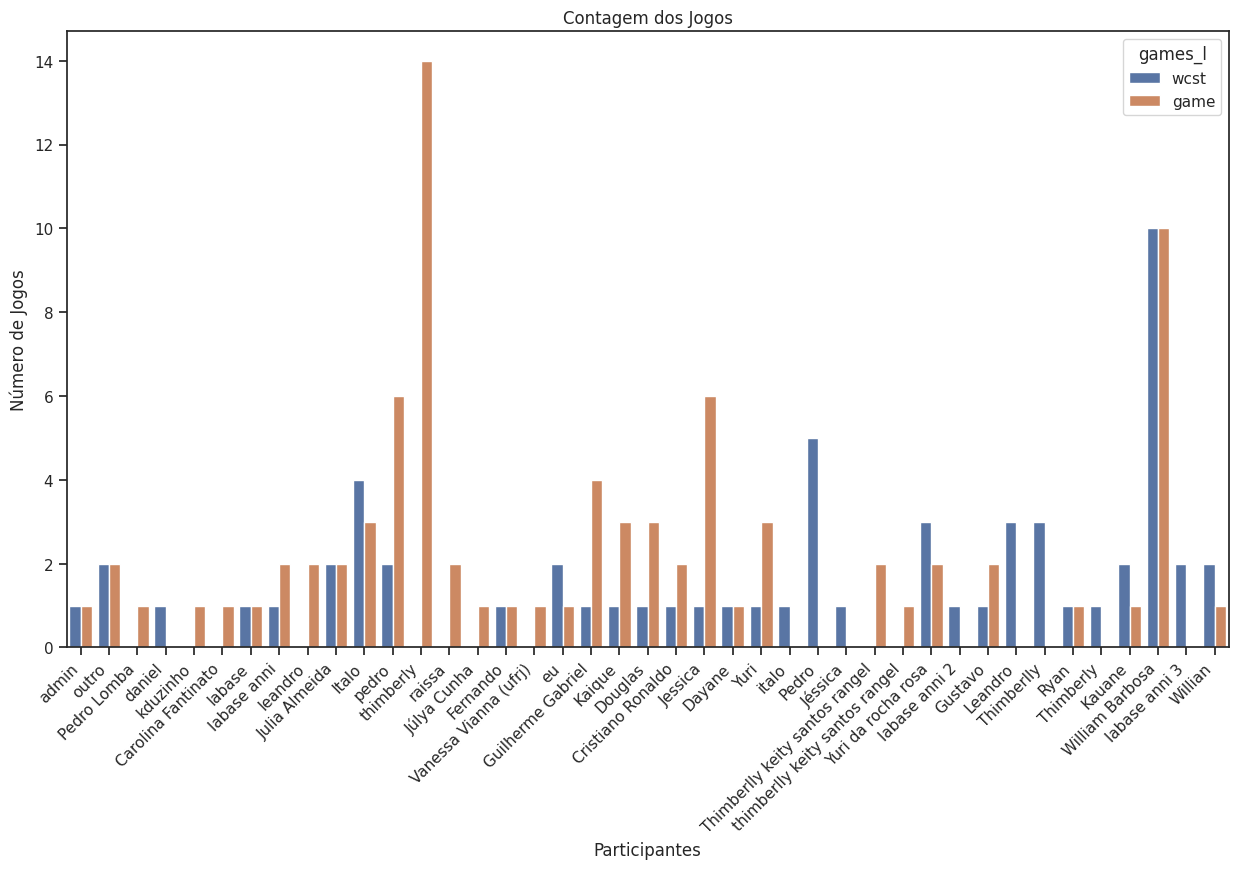

In [68]:
import seaborn as sns
from matplotlib import pyplot as plt
dfx = df.explode('games_l')
# dfm = pd.melt(df, 'games_l')
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfx, x="name", hue="games_l")
_ = chart.set(title='Contagem dos Jogos', ylabel='Número de Jogos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


In [69]:
df

_id             name    ano       sexo  \
0   ObjectId('6477ce20f626d3cb95e08c8f')            admin   ano1  masculino   
1   ObjectId('6477cf19f626d3cb95e08c92')            outro   ano2   feminino   
2   ObjectId('647b8008f626d3cb95e08c98')      Pedro Lomba   ano9  masculino   
3   ObjectId('647b85f9f626d3cb95e08c9b')           daniel   ano9  masculino   
4   ObjectId('647b86cbf626d3cb95e08c9d')         kduzinho   ano1  masculino   
..                                   ...              ...    ...        ...   
69  ObjectId('64a78b02b23753d1d92bcbef')  William Barbosa   ano6  masculino   
70  ObjectId('64a78bc5b23753d1d92bcbfb')  William Barbosa   ano6  masculino   
71  ObjectId('64ad5f32b23753d1d92bcbff')    labase anni 3  ano11   feminino   
72  ObjectId('64ad8285b23753d1d92bcc02')          Willian   ano6  masculino   
73  ObjectId('64ad8b55b23753d1d92bcc04')          Willian   ano6  masculino   

     idade                              time  \
0   anos10  2023-05-31 19:45:52.561244-03:00   
1    anos9  2023-05-31 19:50:01.899904-03:00   
2   anos10  2023-06-03 15:01:44.637563-03:00   
3   anos10  2023-06-03 15:27:05.449207-03:00   
4    anos1  2023-06-03 15:30:35.506478-03:00   
..     ...                               ...   
69   anos9  2023-07-07 00:48:18.261089-03:00   
70   anos9  2023-07-07 00:51:33.056750-03:00   
71  anos17  2023-07-11 10:54:58.216055-03:00   
72   anos8  2023-07-11 13:25:41.129120-03:00   
73   anos8  2023-07-11 14:03:17.237552-03:00   

                                                games  \
0   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
1   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
2   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
3   [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
4   [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
..                                                ...   
69  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
70  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
71  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   
72  [{'game': 'game', 'goal': 0, 'trial': 0, 'scor...   
73  [{'game': 'wcst', 'goal': 0, 'trial': 0, 'scor...   

                                              games_l  eica  wcst  
0                                        [wcst, game]     1     1  
1                            [wcst, wcst, game, game]     2     2  
2                                              [game]     1     0  
3                                              [wcst]     0     1  
4                                              [game]     1     0  
..                                                ...   ...   ...  
69  [game, game, wcst, wcst, wcst, wcst, wcst, wcs...     2     9  
70                                       [wcst, game]     1     1  
71                                       [wcst, wcst]     0     2  
72                                             [game]     1     0  
73                                       [wcst, wcst]     0     2  

[74 rows x 10 columns]

## Converte ObjectId para Identificador

In [70]:
import re
matches = [re.findall(r"'(.+?)'",text)[0] for text in df._id.to_list()]
df["oid"] = matches
dfo = df
df.oid[1]

'6477cf19f626d3cb95e08c92'

## Testa a recuperação dos dados de um jogador

In [71]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/player?oid=6477cf19f626d3cb95e08c92'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)
print(df)

                                    _id   name   ano      sexo  idade  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  ano2  feminino  anos9   

                               time  \
0  2023-05-31 19:50:01.899904-03:00   
1  2023-05-31 19:50:01.899904-03:00   
2  2023-05-31 19:50:01.899904-03:00   
3  2023-05-31 19:50:01.899904-03:00   

                                               games  
0  {'game': 'wcst', 'goal': 0, 'trial': 0, 'score...  
1  {'game': 'wcst', 'goal': 0, 'trial': 1, 'score...  
2  {'game': 'game', 'goal': 0, 'trial': 0, 'score...  
3  {'game': 'game', 'goal': 0, 'trial': 1, 'score...  


## Limpeza dos dados dos games

In [72]:
df0 = pd.DataFrame(df.games.to_list())
df0
# df.games

game  goal  trial                                scorer
0  wcst     0      0  ObjectId('6477cf1df626d3cb95e08c93')
1  wcst     0      1  ObjectId('6477cf29f626d3cb95e08c94')
2  game     0      0  ObjectId('6477cf31f626d3cb95e08c95')
3  game     0      1  ObjectId('6477cf53f626d3cb95e08c96')

## Obtém o identificador de pontuação em formato texto

In [73]:
df0['score'] = [re.findall(r"'(.+?)'",text)[0] for text in df0.scorer.to_list()]
df0

game  goal  trial                                scorer  \
0  wcst     0      0  ObjectId('6477cf1df626d3cb95e08c93')   
1  wcst     0      1  ObjectId('6477cf29f626d3cb95e08c94')   
2  game     0      0  ObjectId('6477cf31f626d3cb95e08c95')   
3  game     0      1  ObjectId('6477cf53f626d3cb95e08c96')   

                      score  
0  6477cf1df626d3cb95e08c93  
1  6477cf29f626d3cb95e08c94  
2  6477cf31f626d3cb95e08c95  
3  6477cf53f626d3cb95e08c96

## Recupera os dados de jogadas de um jogador

In [74]:
import urllib.request, json
import pandas as pd

furl = 'https://games.alite.selfip.org/score/games?oid=6477cf19f626d3cb95e08c92'
with urllib.request.urlopen(furl) as url:
    data = json.loads(url.read().decode())
    dfg = pd.DataFrame(data)
print(dfg)

                                    _id   name  game  goal  trial  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

                                              scorer  
0  [{'carta': 0, 'casa': 'no no no', 'move': 'no ...  
1  [{'carta': 0, 'casa': 'no no no', 'move': 'no ...  
2  [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move...  
3  [{'carta': '__I_N_I_T__', 'casa': '0_0', 'move...  


## Expande a lista interna de games e transforma em colunas

In [75]:
dfx = dfg.explode('scorer')
dfxx = dfx.drop(columns=["scorer"], inplace=False).join(
    dfx.apply(lambda x: pd.Series(x["scorer"].values(), index=x["scorer"].keys()), axis=1))
dfxx

_id   name  game  goal  trial  \
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

           carta                   casa                     move     ponto  \
0              0               no no no                 no no no       000   
0              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
0              2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
0              0               no no no                 no no no       000   
0              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
0              2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
0              0               no no no                 no no no       000   
0              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
0              2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
1              0               no no no                 no no no       000   
1              1   Duas Estrelas Verdes       Um Triângulo Verde       100   
1              2   Três Cruzes Amarelas  Quatro Cruzes Vermelha

In [76]:
dfxl = pd.DataFrame(dfx.scorer.values.tolist())
dfx = dfx.drop(columns=["scorer"], inplace=False).reset_index()
dfxj = dfx.join(dfxl)
dfxj

index                                   _id   name  game  goal  trial  \
0       0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
1       0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
2       0  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      0   
3       1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
4       1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
5       1  ObjectId('6477cf19f626d3cb95e08c92')  outro  wcst     0      1   
6       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
7       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
8       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
9       2  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      0   
10      3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
11      3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   
12      3  ObjectId('6477cf19f626d3cb95e08c92')  outro  game     0      1   

            carta                   casa                     move     ponto  \
0               0               no no no                 no no no       000   
1               1   Duas Estrelas Verdes       Um Triângulo Verde       100   
2               2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas       200   
3               0               no no no                 no no no       000   
4               1   Duas Estrelas Verdes       Um Triângulo Verde       100   
5               2   Três Cruzes Amarelas  Quatro Cruzes Vermelhas       000   
6     __I_N_I_T__                    0_0                       ok    _INIT_   
7   __A_T_I_V_A__                    0_0                       ok  _LINGUA_   
8        34_10_14                    0_0                       ok    _FALA_   
9        30_46_31                    0_0                       ok    _FALA_   
10    __I_N_I_T__                    0_0                       ok    _INIT_   
11  __A_T_I_V_A__                    0_0                       ok   _MUNDO_   
12             13                596_448                       ok   _Mundo_   

   valor                        time  
0   0000  2023-05-31 19:50:05.437000  
1   1000  2023-05-31 19:50:08.186000  
2   1000  2023-05-31 19:50:10.643000  
3   0000  2023-05-31 19:50:17.902000  
4   1000  2023-05-31 19:50:19.704000  
5   0100  2023-05-31 19:50:21.429000  
6   True  2023-05-31 19:50:26.703999  
7   True  2023-05-31 19:50:30.453999  
8   True  2023-05-31 19:50:35.878000  
9   True  2023-05-31 19:50:52.269999  
10  True  2023-05-31 19:50:59.826999  
11  True  2023-05-31 19:51:05.345999  
12  True  2023-05-31 19:51:11.971999

# Recuperação e plotagem das jogadas

## Pedido dos dados ao servidor e converte num arcabouço de dados

In [77]:
import urllib.request, json
import pandas as pd
furl = 'https://games.alite.selfip.org/score/games?oid={}'
dfa = pd.DataFrame()
dfl = []

def retrieve_games(player):
    global dfl
    with urllib.request.urlopen(furl.format(player)) as urlp:
        dfl.extend(json.loads(urlp.read().decode()))
def process_df():
    dfg_ = pd.DataFrame(dfl)

    dfx_ = dfg_.explode('scorer')
    dfxl_ = [d for d in dfx_.scorer.values.tolist() if isinstance(d, dict)]
    dfxl_ = pd.DataFrame(dfxl_)
    dfx_ = dfx_.drop(columns=["scorer"], inplace=False).reset_index()
    return dfx_.join(dfxl_)
# retrieve_games('6477cf19f626d3cb95e08c92')
games = [retrieve_games(oid) for oid in dfo.oid.to_list()]
# print(dfl)
# dfg = pd.DataFrame(dfl)
# dfx = dfg.explode('scorer')
# dfl = dfx.scorer.values.tolist()
# isinstance(dfl[1712], dict)
# dfl = [d for d in dfl if isinstance(d, dict)]
# pd.DataFrame(dfl)
# dfa = process_df()
# dfa

## Gera o arcabouço de dados das jogadas

In [78]:
dfa = process_df()

dfa

index                                   _id     name  game  goal  \
0          0  ObjectId('6477ce20f626d3cb95e08c8f')    admin  wcst     0   
1          0  ObjectId('6477ce20f626d3cb95e08c8f')    admin  wcst     0   
2          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
3          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
4          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
...      ...                                   ...      ...   ...   ...   
12004    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12005    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12006    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12007    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12008    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   

       trial          carta                  casa                move  \
0          0              0              no no no            no no no   
1          0              1  Duas Estrelas Verdes  Um Triângulo Verde   
2          0    __I_N_I_T__                   0_0                  ok   
3          0  __A_T_I_V_A__                   0_0                  ok   
4          0       minitens               400_520                  ok   
...      ...            ...                   ...                 ...   
12004      1            NaN                   NaN                 NaN   
12005      1            NaN                   NaN                 NaN   
12006      1            NaN                   NaN                 NaN   
12007      1            NaN                   NaN                 NaN   
12008      1            NaN                   NaN                 NaN   

          ponto     valor                        time  
0           000      0000  2023-05-31 19:46:43.649000  
1           100      1000  2023-05-31 19:46:49.652000  
2        _INIT_      True  2023-05-31 19:49:01.943000  
3      _CHAVES_      True  2023-05-31 19:49:08.206000  
4        _ABAS_  minitens  2023-05-31 19:49:11.043999  
...         ...       ...                         ...  
12004       NaN       NaN                         NaN  
12005       NaN       NaN                         NaN  
12006       NaN       NaN                         NaN  
12007       NaN       NaN                         NaN  
12008       NaN       NaN                         NaN  

[12009 rows x 12 columns]

## Separa os dados do Wisconsin

In [103]:
dfwc = dfa.loc[dfa['game'] == 'wcst']
dfwc

index                                   _id     name  game  goal  \
0          0  ObjectId('6477ce20f626d3cb95e08c8f')    admin  wcst     0   
1          0  ObjectId('6477ce20f626d3cb95e08c8f')    admin  wcst     0   
10         2  ObjectId('6477cf19f626d3cb95e08c92')    outro  wcst     0   
11         2  ObjectId('6477cf19f626d3cb95e08c92')    outro  wcst     0   
12         2  ObjectId('6477cf19f626d3cb95e08c92')    outro  wcst     0   
...      ...                                   ...      ...   ...   ...   
12004    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12005    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12006    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12007    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   
12008    143  ObjectId('64ad8b55b23753d1d92bcc04')  Willian  wcst     0   

       trial carta                   casa                     move ponto  \
0          0     0               no no no                 no no no   000   
1          0     1   Duas Estrelas Verdes       Um Triângulo Verde   100   
10         0     0               no no no                 no no no   000   
11         0     1   Duas Estrelas Verdes       Um Triângulo Verde   100   
12         0     2  Um Triângulo Vermelho  Quatro Cruzes Vermelhas   200   
...      ...   ...                    ...                      ...   ...   
12004      1   NaN                    NaN                      NaN   NaN   
12005      1   NaN                    NaN                      NaN   NaN   
12006      1   NaN                    NaN                      NaN   NaN   
12007      1   NaN                    NaN                      NaN   NaN   
12008      1   NaN                    NaN                      NaN   NaN   

      valor                        time  
0      0000  2023-05-31 19:46:43.649000  
1      1000  2023-05-31 19:46:49.652000  
10     0000  2023-05-31 19:50:05.437000  
11     1000  2023-05-31 19:50:08.186000  
12     1000  2023-05-31 19:50:10.643000  
...     ...                         ...  
12004   NaN                         NaN  
12005   NaN                         NaN  
12006   NaN                         NaN  
12007   NaN                         NaN  
12008   NaN                         NaN  

[3849 rows x 12 columns]

## Gráfico de contagem de pontos no Wisc

### Classe para concentrar as operações de arcabouço

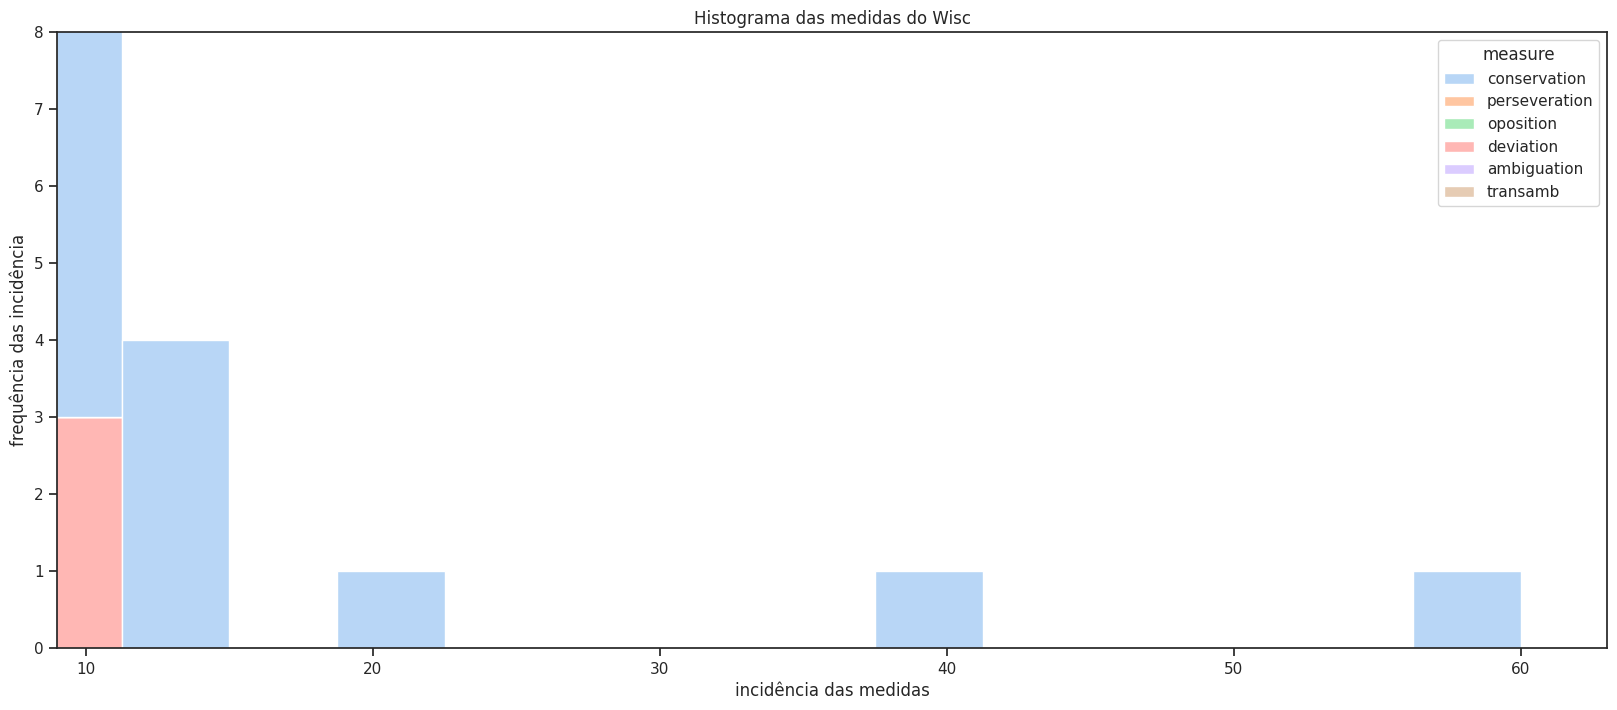

In [104]:
from pandas import DataFrame
from collections import namedtuple
from dataclasses import dataclass

@dataclass
class Plot:
    kind = "value plot factor violin hist heat".split()
    icon = [(6, 5), (6, 5), (3, 2), (6, 0), (2, 2), (5, 4)]
    value = dict(col='valor', title='Contagem dos Valores Wisc', ylabel='Contagem de Valores',
                 xlabel="Participantes", sub_title="Counting Plot de valores do teste Wisconsin")
    plot = dict(col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos',
                xlabel="Participantes", sub_title="Counting Plot de pontos do teste Wisconsin")
    factor = dict(col='ponto', title='Factor Plot das medidas do Wisc', ylabel='frequência das incidência',
                  xlabel="incidência das medidas", sub_title="Factor Plot do teste Wisconsin")
    violin = dict(col='ponto', title='Violin Plot das medidas do Wisc', ylabel='frequência das incidência',
                  xlabel="incidência das medidas", sub_title="Violin Plot do teste Wisconsin")
    hist = dict(col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência',
                xlabel="incidência das medidas", sub_title="Histogram Plot do teste Wisconsin")
    heat = dict(col='ponto', title='Correlação das medidas do Wisc', ylabel='listagem das incidência',
                xlabel="listagem das medidas", sub_title="Heatmap Plot dos fatores no teste Wisconsin")
    plotting = dict(value=value, plot=plot, factor=factor, violin=violin, hist=hist, heat=heat)

import numpy as np
class WiscPlot:
    Cfplot = namedtuple("Cfplot", "col title ylabel xlabel")
    Pnt = namedtuple("Pnt", "ok no td")
    Val = namedtuple("Val", "cc cf cn ct")
    def __init__(self, game_url='https://games.alite.selfip.org/score/games?oid={}'):
        self.game_url = game_url
        self.df: DataFrame = DataFrame()
        self.game_data = []
        self.count = 0

    def retrieve_games(self, player):
        """ Retrieve from remote source data for a given player

        :param player: Given player id; identification
        :return: None
        """
        with urllib.request.urlopen(self.game_url.format(player)) as urlp:
            self.game_data.extend(json.loads(urlp.read().decode()))

    def process_df(self):
        """ Shapes current dataframe to filter wisc and replace the column scorer

        :return:
        """
        dfg_ = DataFrame(self.game_data)
        dfg_ = dfg_.loc[dfg_['game'] == 'wcst']
        dfg_["name"] = dfg_.name.apply(lambda x: f"{n[0]} {n[1][:2]}." if len(n := x.split()) > 1 else x)

        dfx_ = dfg_.explode('scorer')
        valor_list = [text if type(text) == dict else {} for text in dfx_.scorer.values.tolist()]

        dfl_ = DataFrame(valor_list)
        dfx_ = dfx_.drop(columns=["scorer"], inplace=False).reset_index()
        return dfx_.join(dfl_)

    def get_all_games(self, player_oids):
        """ Get all games from a given player.

        :param player_oids: Given player id
        :return: None (assign to current df attribute)
        """
        _ = [self.retrieve_games(oid) for oid in player_oids]
        # print(self.game_data)
        self.df = self.process_df()

    def retrieve_oid_from_person_df(self, person_df):
        """ Trim id vale from extra surroundings.

        :param person_df: Given player dataframe
        :return: self (this object)
        """
        import re
        # noinspection PyProtectedMember
        oid_list = [re.findall(r"'(.+?)'", text)[0] for text in person_df._id.to_list()]
        self.get_all_games(oid_list)
        return self

    def refine_point_value_info(self):
        """ Extract some cognitive relevant properties from existing data,

        :return: transformed dataframe with new columns
        """

        def counter(a, b):
            """ Counts repetition of a figure.

            :param a: current figure of the series
            :param b: next figure of the series
            :return: count if prevails or zero if not
            """
            a, b = int(a), int(b)
            self.count += (1 if a else 0)
            count, self.count = self.count if not b else 0, 0 if not b else self.count
            return count
        def alter(a, b):
            a, b = int(a), int(b)
            no_alter = (a == b) or (b==0) or (a==0)
            self.count += (1 if a!=b else 0)
            count, self.count = self.count if no_alter else 0, 0 if no_alter else self.count
            return count

        def joiner(k, t, w):
            k, t = int(k), int(t)
            return int(int(t != w) * 2 ** w * k)

        def nobother(cc, cf, cn, ct):
            non =  [int(cc), int(cf), int(cn)]
            do = non.pop(int(ct)%3) < 1
            return int(all(non)) if do else 0

        def noner(cc, cf, cn, ct):
            non =  [int(cc), int(cf), int(cn)]
            do = non.pop(int(ct)%3) < 1
            return (non[0] + 2* non[1]) if do else 0
            # return int(any(non)) if do else 0
            # return 1 if do else 0

        def bother(c, f, n, t, e=True):
            c, f, n, t = int(c), int(f), int(n), int(t) % 3
            all_k = [c, f, n]
            if t > 2 or t < 0:
                raise ValueError(t)
            target = all_k.pop(t)
            return target * sum(all_k) if e else int(all(all_k))
        point_list = [text if type(text) == str else "000" for text in self.df.ponto.to_list()]
        valor_list = [text if type(text) == str else "0000" for text in self.df.valor.to_list()]

        point_list = [self.Pnt(text[:-2], *list(text[-2:])) for text in point_list]
        new_list = point_list[1:] + [self.Pnt(0, 0, 0)]
        val_list0 = [self.Val(*list(text)) for text in valor_list]
        non_list = [noner(*list(val)) for val in valor_list]
        nob_list = [nobother(*list(val)) for val in valor_list]
        val_list = [joiner(val.cc, val.ct, 0) + joiner(val.cf, val.ct, 1) + joiner(val.cn, val.ct, 2)
                    for val in
                    val_list0]
        conservation = [counter(a.ok, b.ok) for a, b in zip(point_list, new_list)]
        perseveration = [counter(a.no, b.no) for a, b in zip(point_list, new_list)]
        deviation = [alter(a, b) for a, b in zip(non_list, non_list[1:] + [0])]
        oposition = [counter(a, b) for a, b in zip(nob_list, nob_list[1:] + [0])]
        ambiguation = [bother(c, f, n, t) for c, f, n, t in val_list0]
        transamb = [bother(c, f, n, t, False) for c, f, n, t in val_list0]
        zipped = list(zip(conservation, perseveration, oposition, deviation, ambiguation, transamb))
        df__ = DataFrame(zipped, columns='conservation perseveration oposition deviation ambiguation transamb'.split())
        _df = self.df.drop(columns='game goal trial carta casa move time ponto valor'.split(),
                           inplace=False).reset_index()
        _df = _df.join(df__).drop(columns='level_0 index _id'.split(), inplace=False)
        # self.df = _df
        return _df

    def plot_template(self, cfg: Cfplot, runner, x_lim=None, y_lim=None, tick=False, tl= False, df=None):
        """ Template method to embrace a given method.

        :param tick: Add slant labels to x-axis.
        :param cfg: Plotting configuration
        :param runner: Given method to be templated.
        :param df: Dataframe source for plotting.
        :param x_lim: Limits for x-axis.
        :param y_lim: Limits for y-axis.
        :return: Plotting context.
        """
        from matplotlib import pyplot as plt_
        f = plt_.figure(figsize=(20, 8))
        ax = f.add_subplot(1, 1, 1)

        if df is None:
            df_ = self.refine_point_value_info()
            df_ = pd.melt(df_, id_vars="name", var_name="measure", value_name="incidence")
        else:
            df_ = df
        chart_ = runner(df_, ax)
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        # _ = chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right')
        chart_.set_xticklabels(chart_.get_xticklabels(), rotation=45, horizontalalignment='right') if tl else None
        _ = chart_.set_xticklabels(rotation=45, horizontalalignment='right') if tick else None
        chart_.set(xlim=x_lim) if x_lim else None
        chart_.set(ylim=y_lim) if y_lim else None
        # chart_.set_xlim(left=x_lim[0], right=x_lim[1]) if x_lim else None
        return plt_

    def plot(self, cfg: Cfplot):
        """ Counting bar plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.countplot(data=df_, x="name", hue=cfg.col), df=self.df,
                                  tl=True)

    def factorplot(self, cfg: Cfplot):
        """ Factor bar plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.catplot(
            x='name', y='incidence', hue='measure', data=df_, kind='bar', height=8, aspect=2.5),
                                  tick=True, y_lim=(0, 1))

    def violinplot(self, cfg: Cfplot):
        """ Violin gaussian plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.boxplot(
            x='name', y='incidence', hue='measure', data=df_), y_lim=(-1, 2), tl=True)

    def histplot(self, cfg: Cfplot):
        """ Histogram bar plot

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        import seaborn as sbn
        return self.plot_template(cfg, lambda df_, a: sbn.histplot(
            data=df_, stat="count", multiple="stack",
            x="incidence", kde=False,
            palette="pastel", hue="measure",
            element="bars", legend=True, ax=a),
                                  x_lim=(9, None), y_lim=(0, 8))

    def heatmap(self, cfg: Cfplot):
        """ Correlation map for cognition profiles

        :param cfg: Plotting configuration
        :return: Plotting context.
        """
        from matplotlib import pyplot as plt_
        import numpy as np
        plt_.figure(figsize=(15, 8))
        df_ = self.refine_point_value_info()
        df_ = df_.drop(columns=['name'], inplace=False)
        # Compute the correlation matrix
        corr = df_.corr()
        # Generate a mask for the upper triangle
        mask = np.triu(np.ones_like(corr, dtype=bool))
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        # Draw the heatmap with the mask and correct aspect ratio
        # chart_ = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
        chart_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                             square=True, linewidths=.5, cbar_kws={"shrink": .5})
        _ = chart_.set(title=cfg.title, ylabel=cfg.ylabel, xlabel=cfg.xlabel)
        return plt_

    def run_plotting(self, kind, data_frame):
        """ Plotting service selector

        :param kind: Selection key
        :param data_frame: Data to be plotted.
        :return: Plotting context
        """
        plotters = dict(value=self.plot, plot=self.plot, factor=self.factorplot,
                        violin=self.violinplot, hist=self.histplot, heat=self.heatmap)
        # from dash import Plotting as Plot
        configurations = dict(Plot.plotting)
        configurations[kind].pop("sub_title") if "sub_title" in configurations[kind] else None
        self.retrieve_oid_from_person_df(data_frame)
        return plotters[kind](WiscPlot.Cfplot(**configurations[kind]))

# out = WiscPlot().rerieve_oid_from_person_df(df_players).refine_point_value_info()
conf0 = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
# out = WiscPlot().rerieve_oid_from_person_df(df_players).factorplot(conf)
conf = WiscPlot.Cfplot(
     col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência', xlabel="incidência das medidas")
out = WiscPlot().retrieve_oid_from_person_df(df_players).histplot(conf)
# out = WiscPlot().rerieve_oid_from_person_df(df_players).violinplot(conf)
# out = WiscPlot().rerieve_oid_from_person_df(df_players).heatmap(conf)
# out = WiscPlot().rerieve_oid_from_person_df(df_players).plot(conf)
# print(out)
# WiscPlot().rerieve_oid_from_person_df(df_players).refine_point_value_info()

## KDE Plot

/tmp/ipykernel_17351/3338436002.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_17351/3338436002.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_17351/3338436002.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


(-1.0, 2.5)

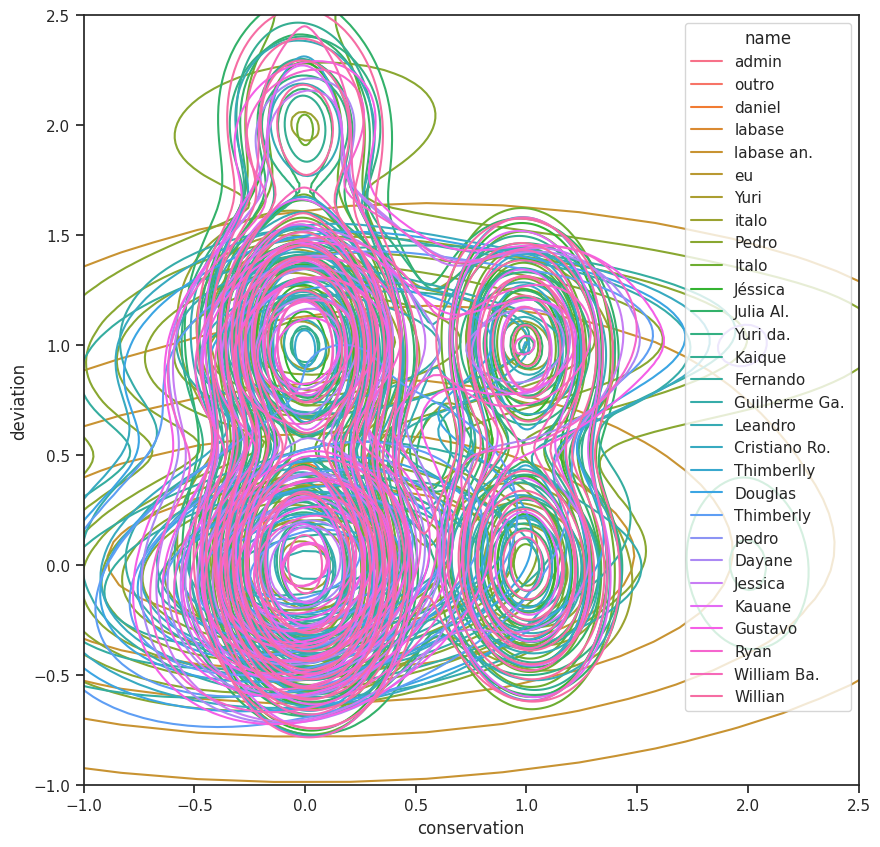

In [105]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(
    data=WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info(),
    x="conservation",
    y="deviation",
    hue="name",
    thresh=.1,
)
ax.set_xlim((-1,2.5))  #
ax.set_ylim((-1,2.5))

## Scatter plot

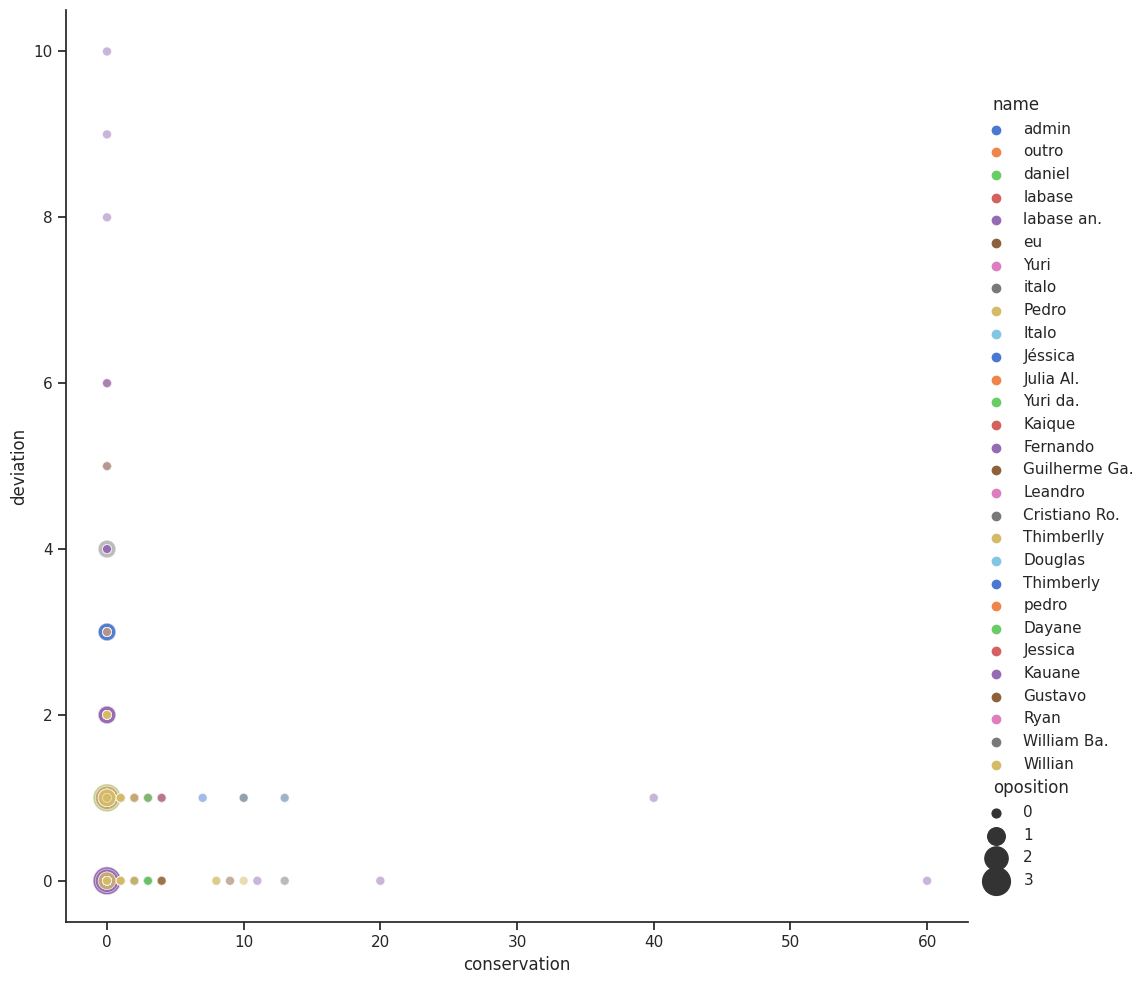

In [106]:
sns.relplot(hue="name", x="conservation", y="deviation", size="oposition",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info())


## Joint Plot

/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


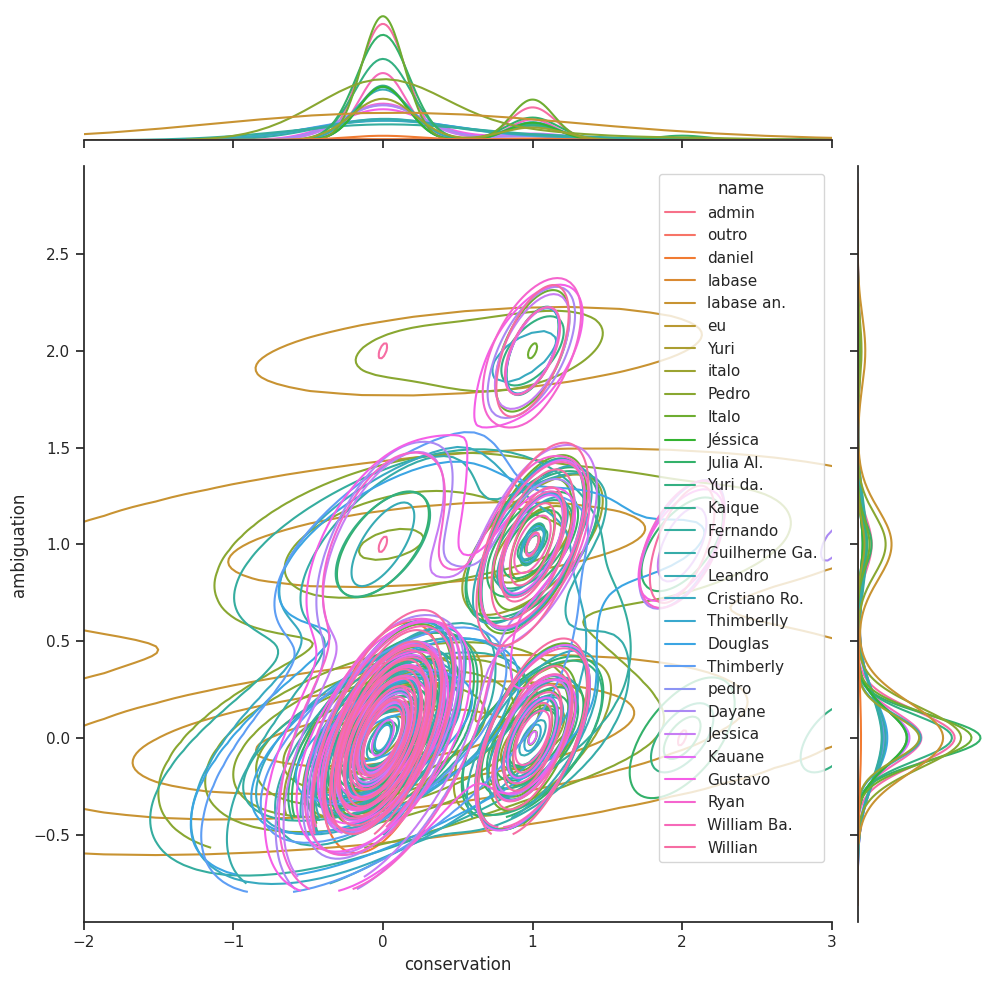

In [107]:
g = sns.jointplot(
    data= WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
,
    x="conservation", y="ambiguation", hue="name", height=10, xlim = (-2,3),
    kind="kde",
)
# g.set(xlim=(-8,8))

## Joint oposition deviation

/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/carlo/Documentos/dev/data_edu/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


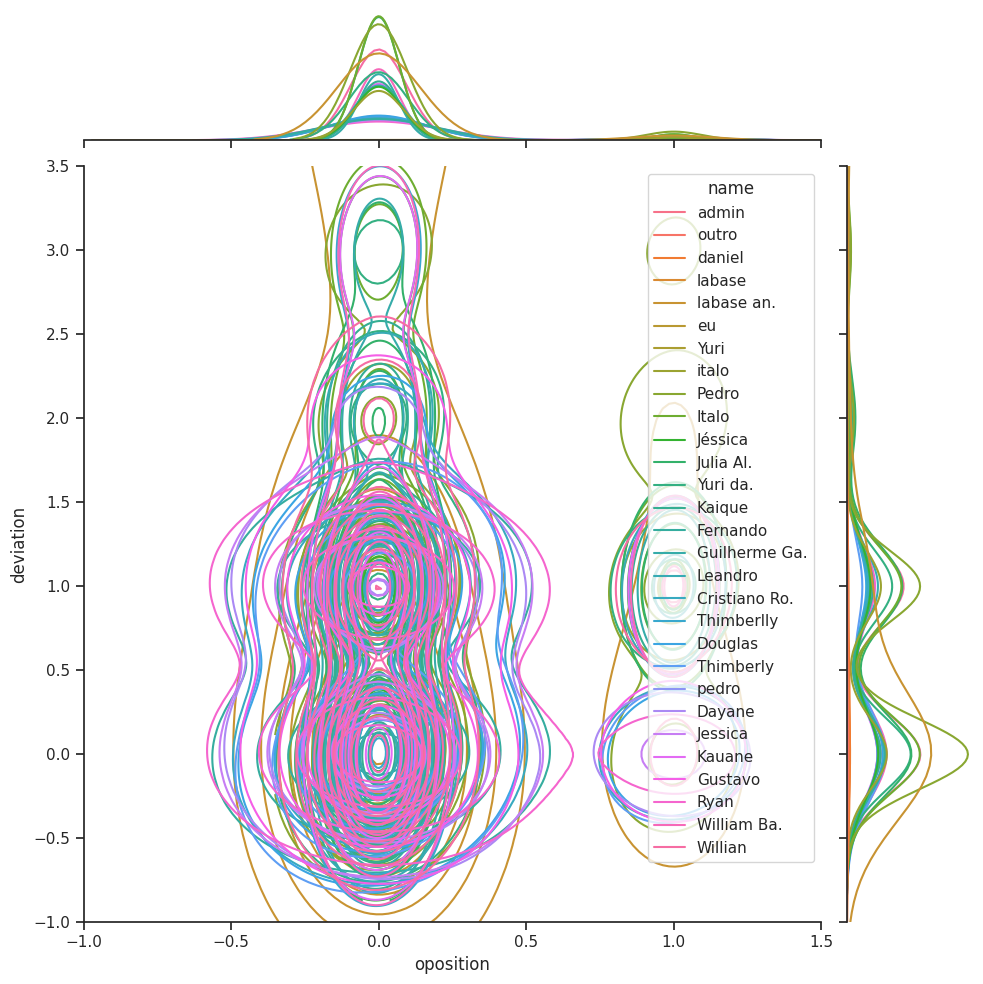

In [108]:
g = sns.jointplot(
    data= WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
,
    x="oposition", y="deviation", hue="name", height=10, ylim = (-1,3.5), xlim = (-1,1.5),
    kind="kde",
)


## Pair Plot

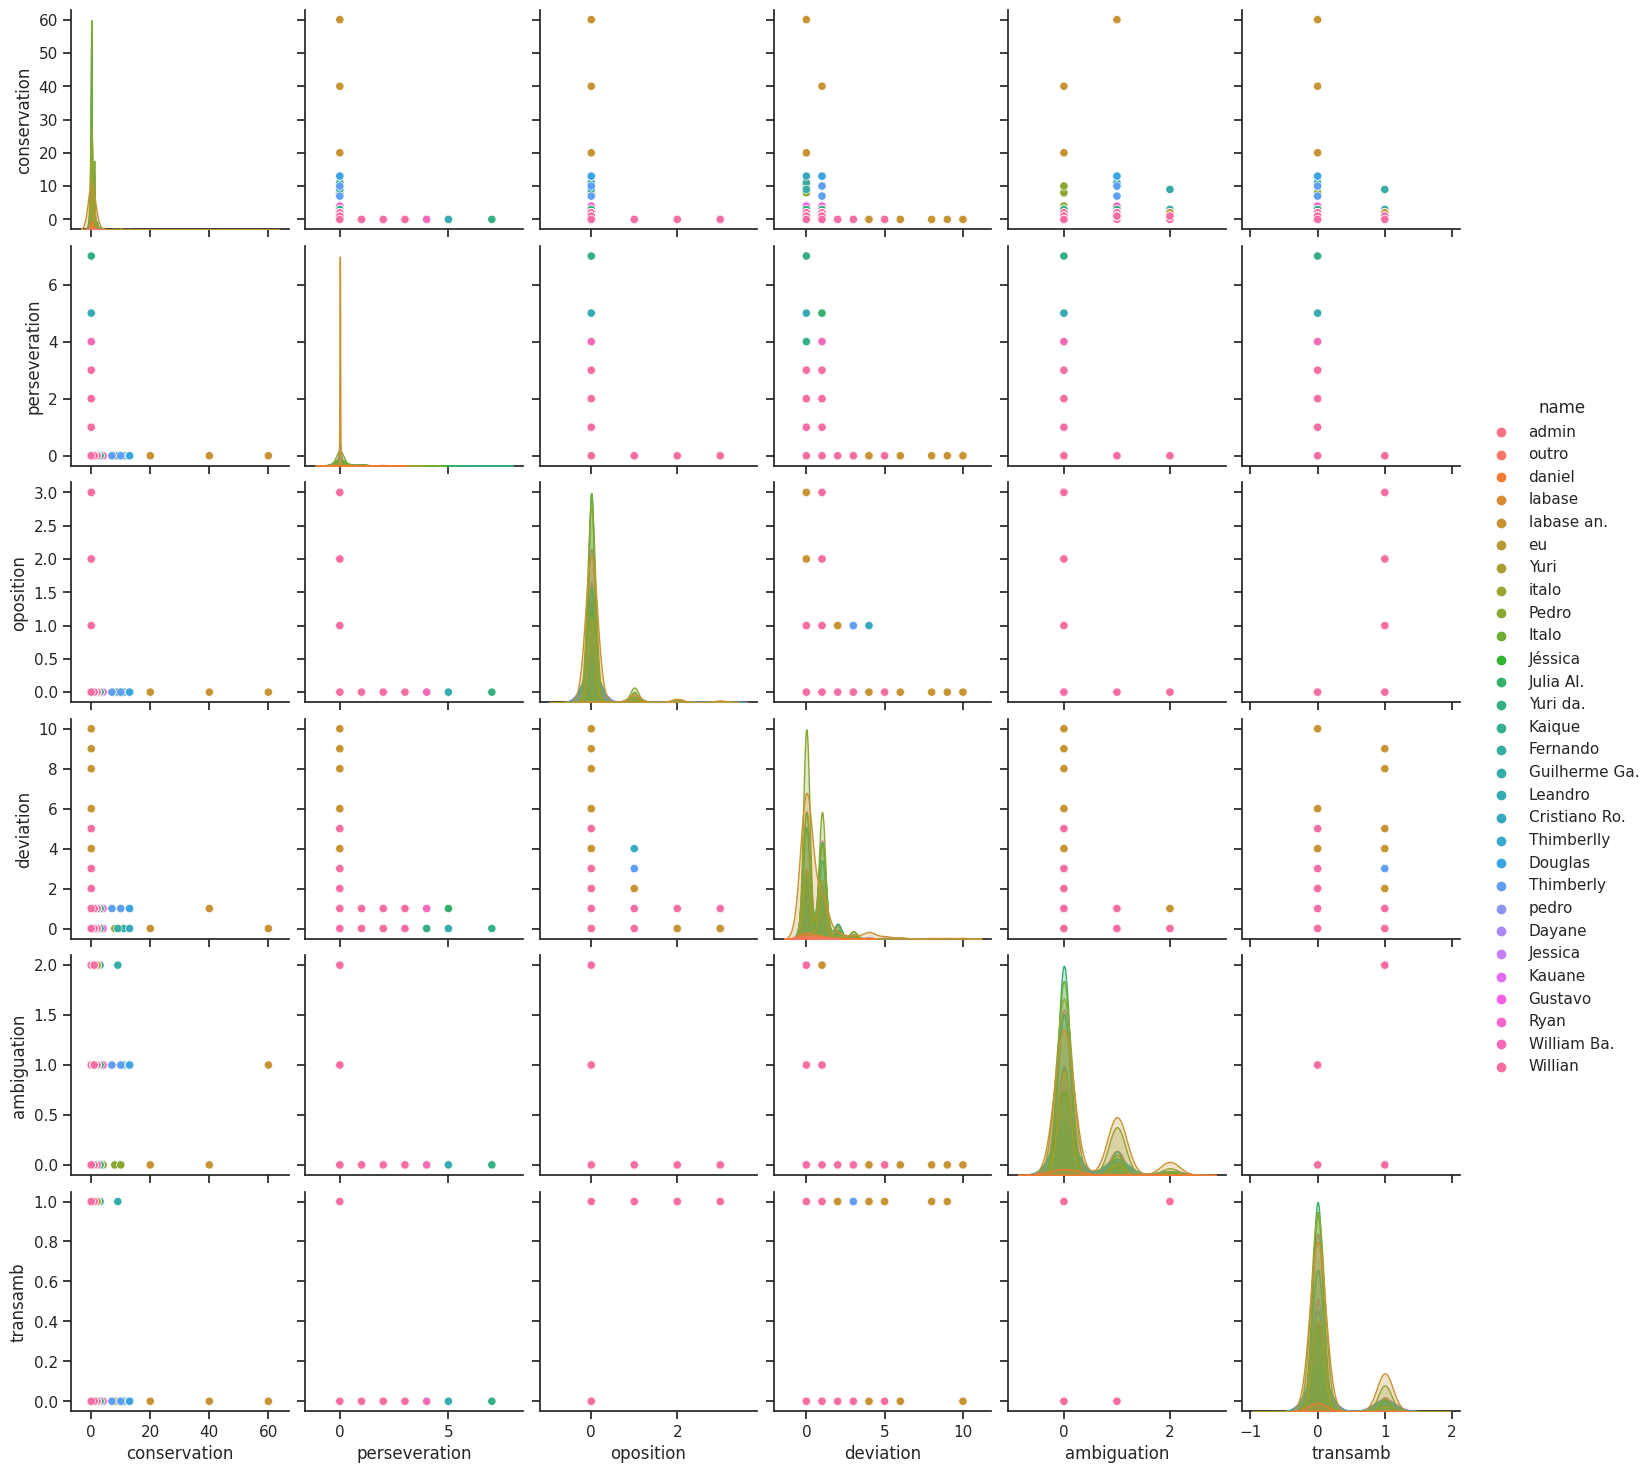

In [109]:
sns.set_theme(style="ticks")
dfp = WiscPlot().retrieve_oid_from_person_df(df_players).refine_point_value_info()
# df = sns.load_dataset("penguins")
sns.pairplot(dfp, hue="name")


## Factor plot

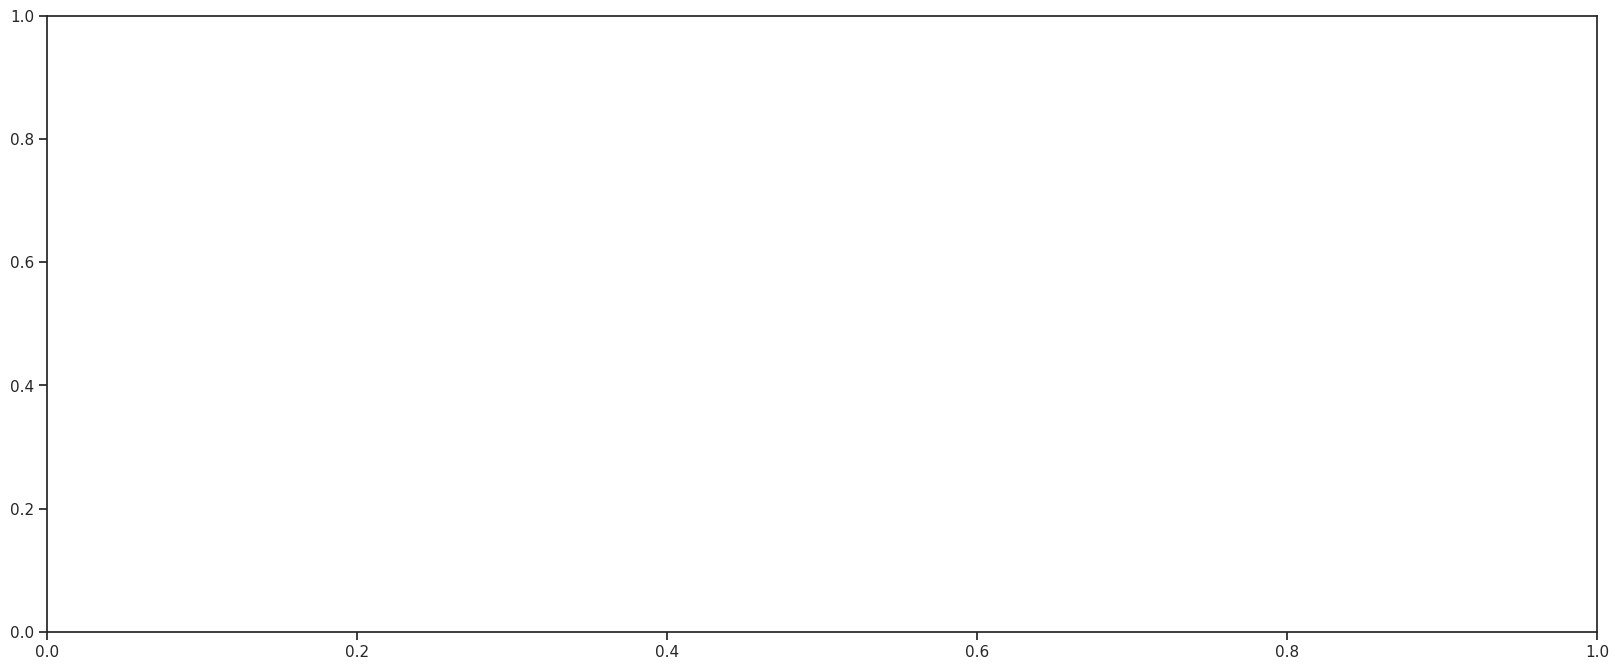

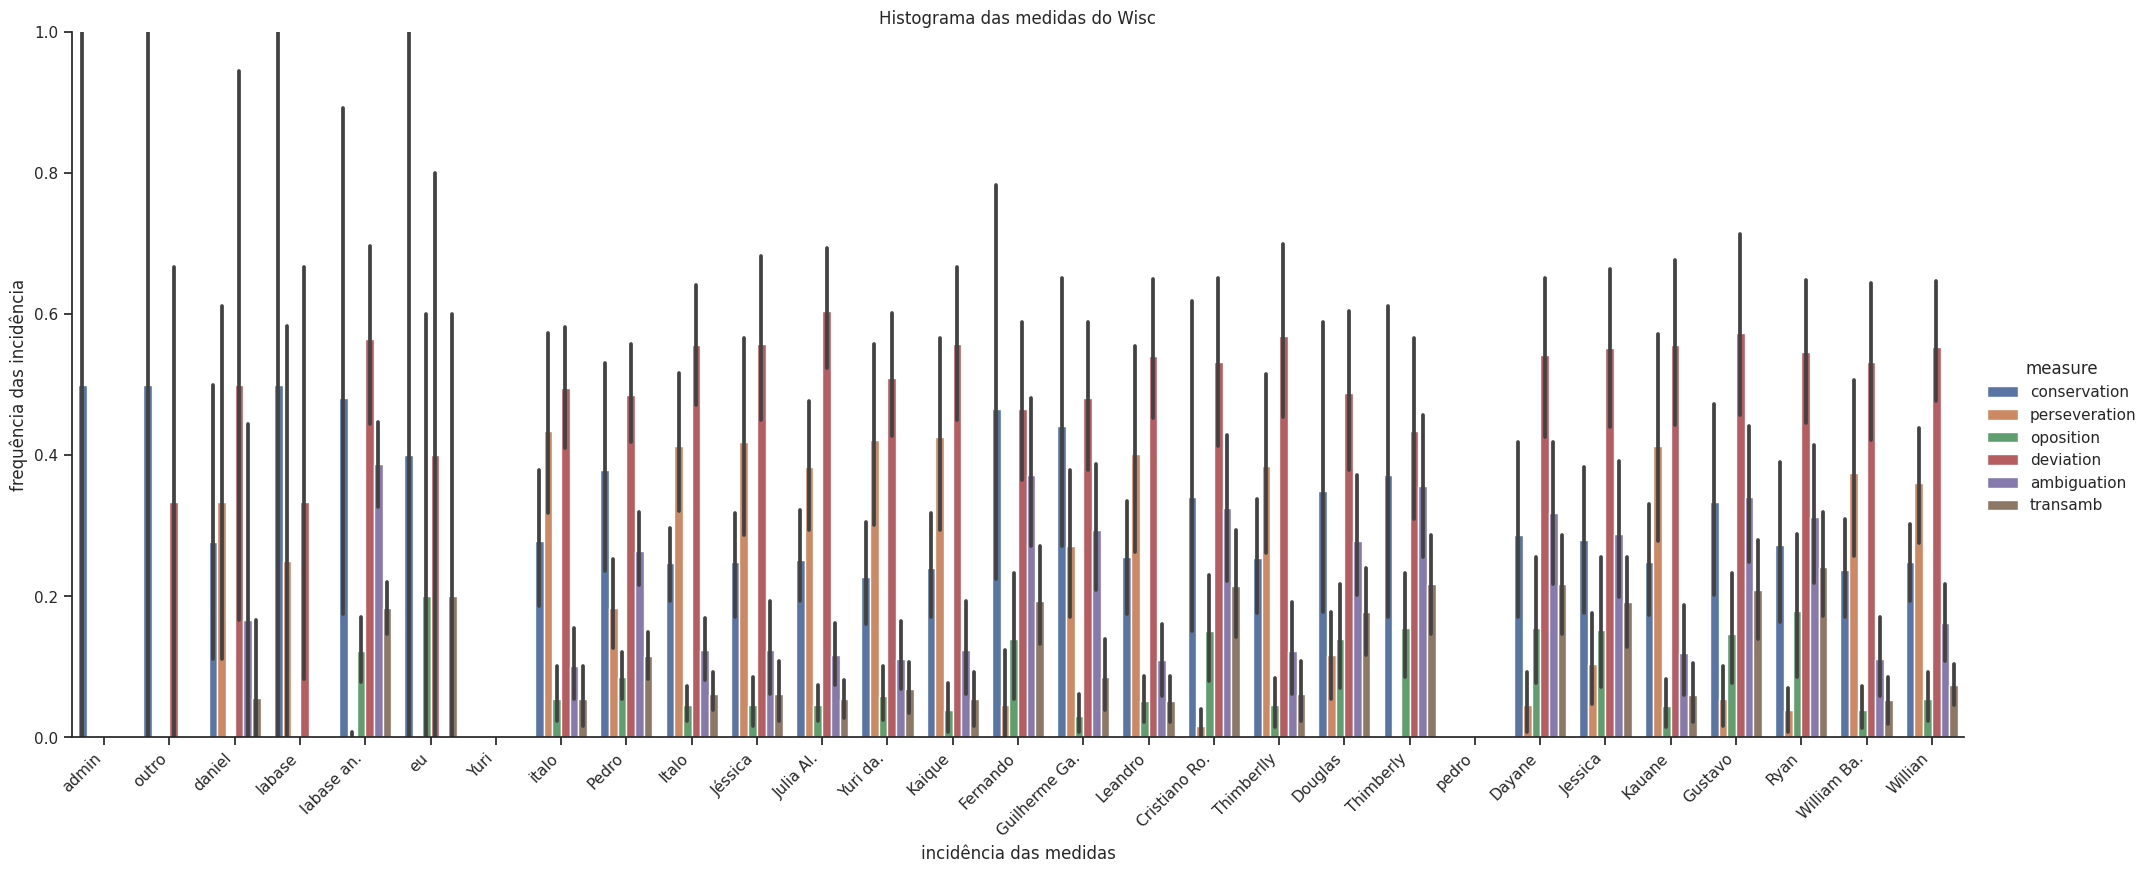

In [110]:
out = WiscPlot().retrieve_oid_from_person_df(df_players).factorplot(conf)


### Plotagem das contagens dos valores do Wiconsin

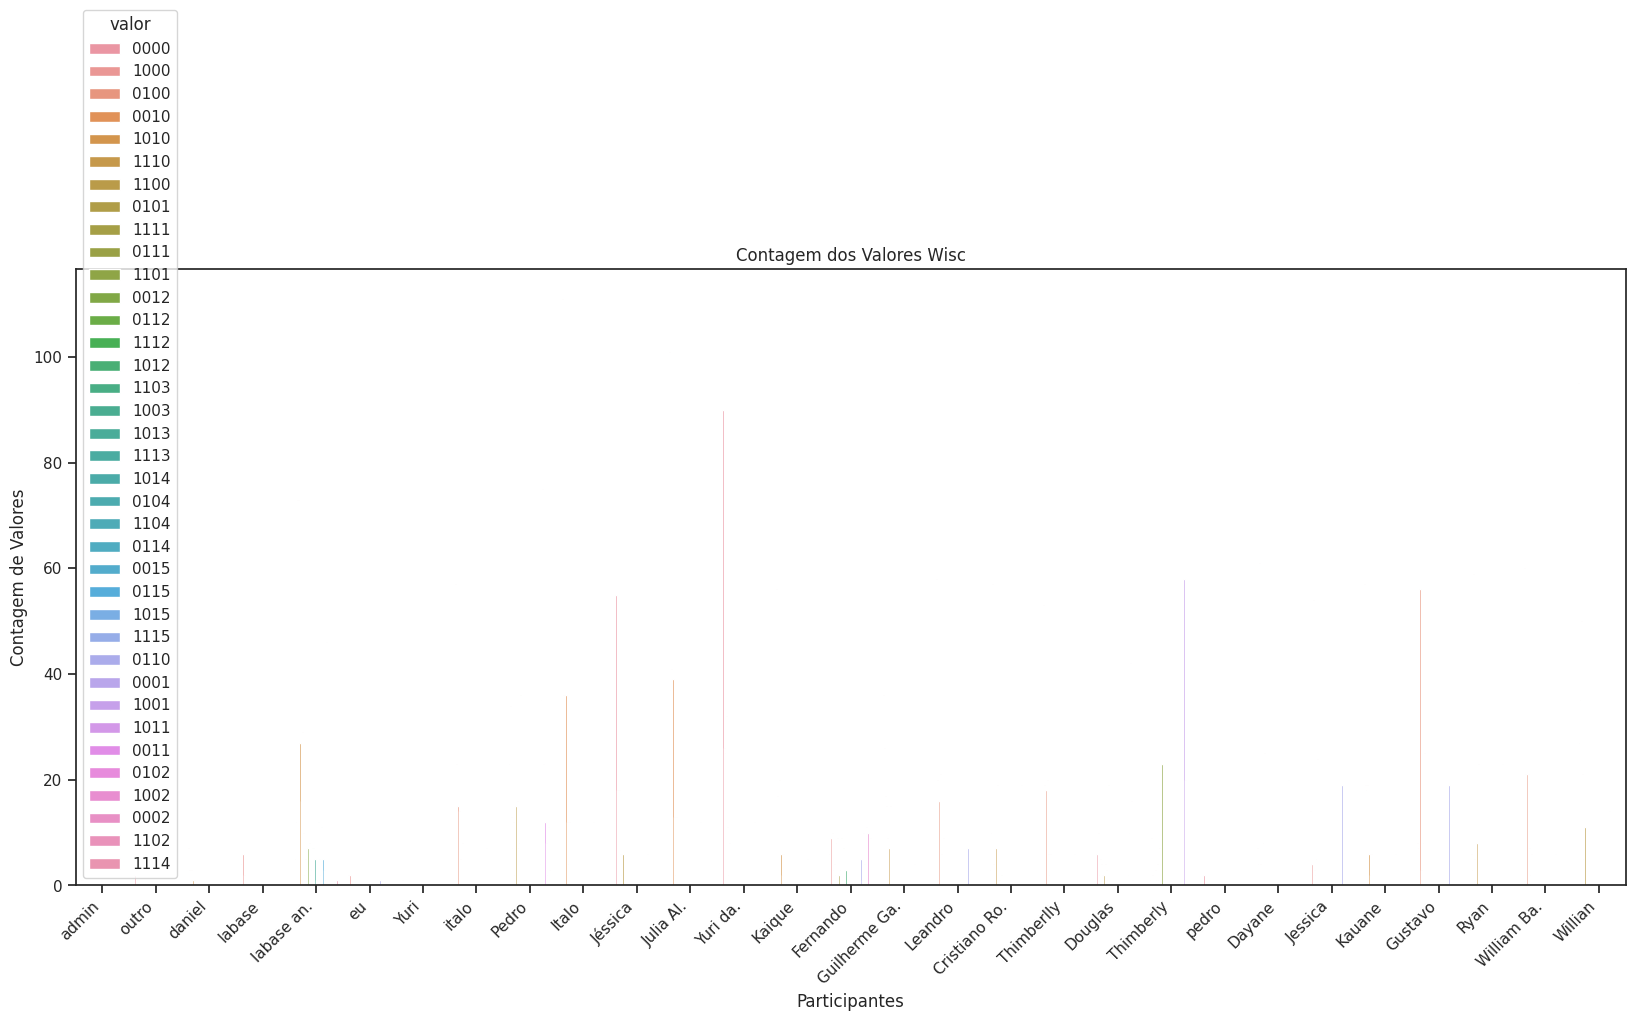

In [111]:
conf = WiscPlot.Cfplot(
     col='valor', title='Contagem dos Valores Wisc', ylabel='Contagem de Valores', xlabel="Participantes")
out = WiscPlot().retrieve_oid_from_person_df(df_players).plot(conf)


### Plotagem das contagens dos pontos do Wiconsin

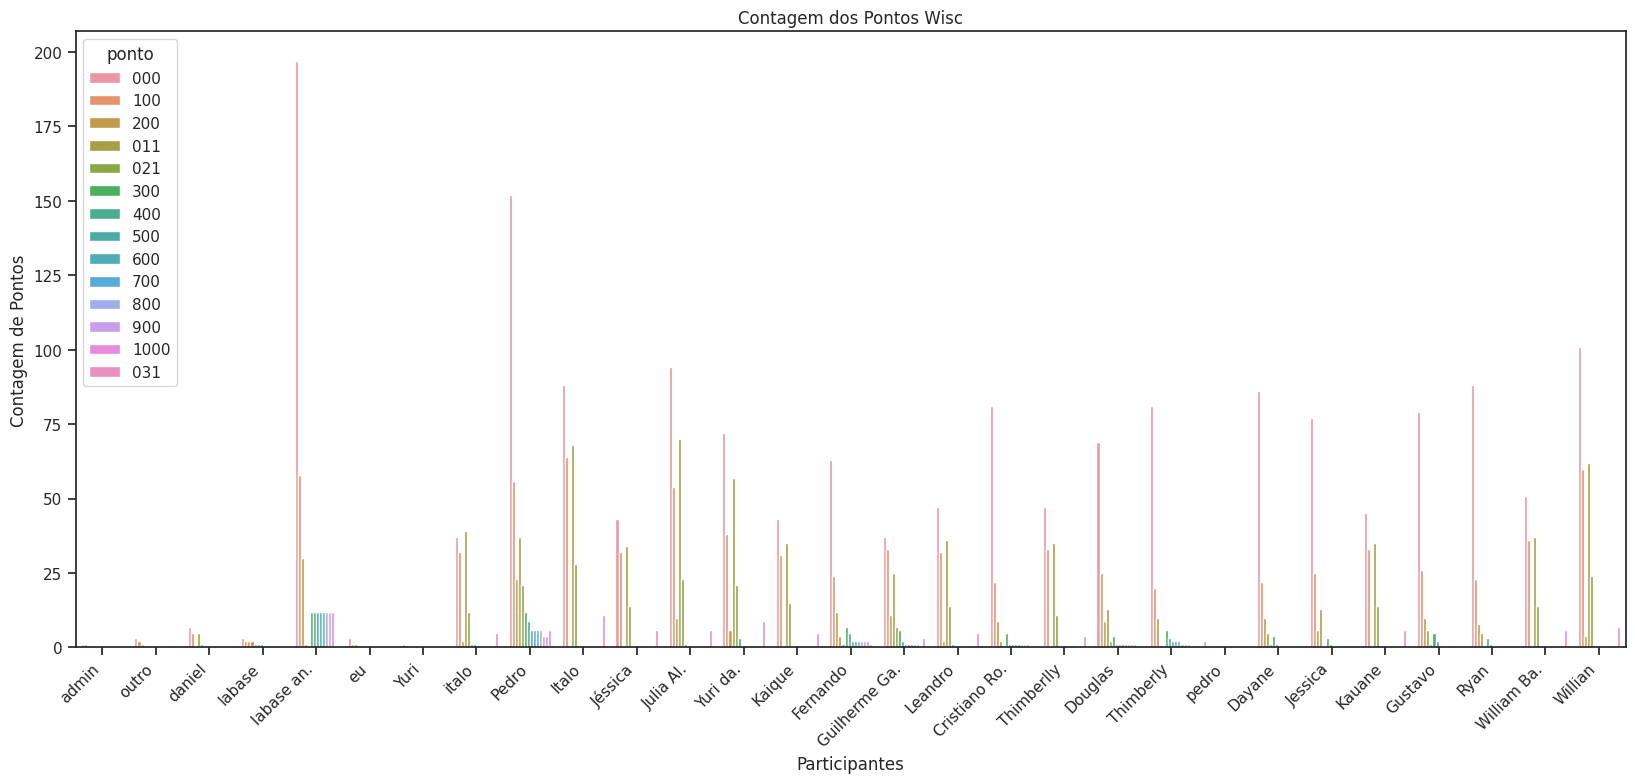

In [112]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
out = WiscPlot().retrieve_oid_from_person_df(df_players).plot(conf)


### Gráfico dos fatores das medidas do Wiconsin

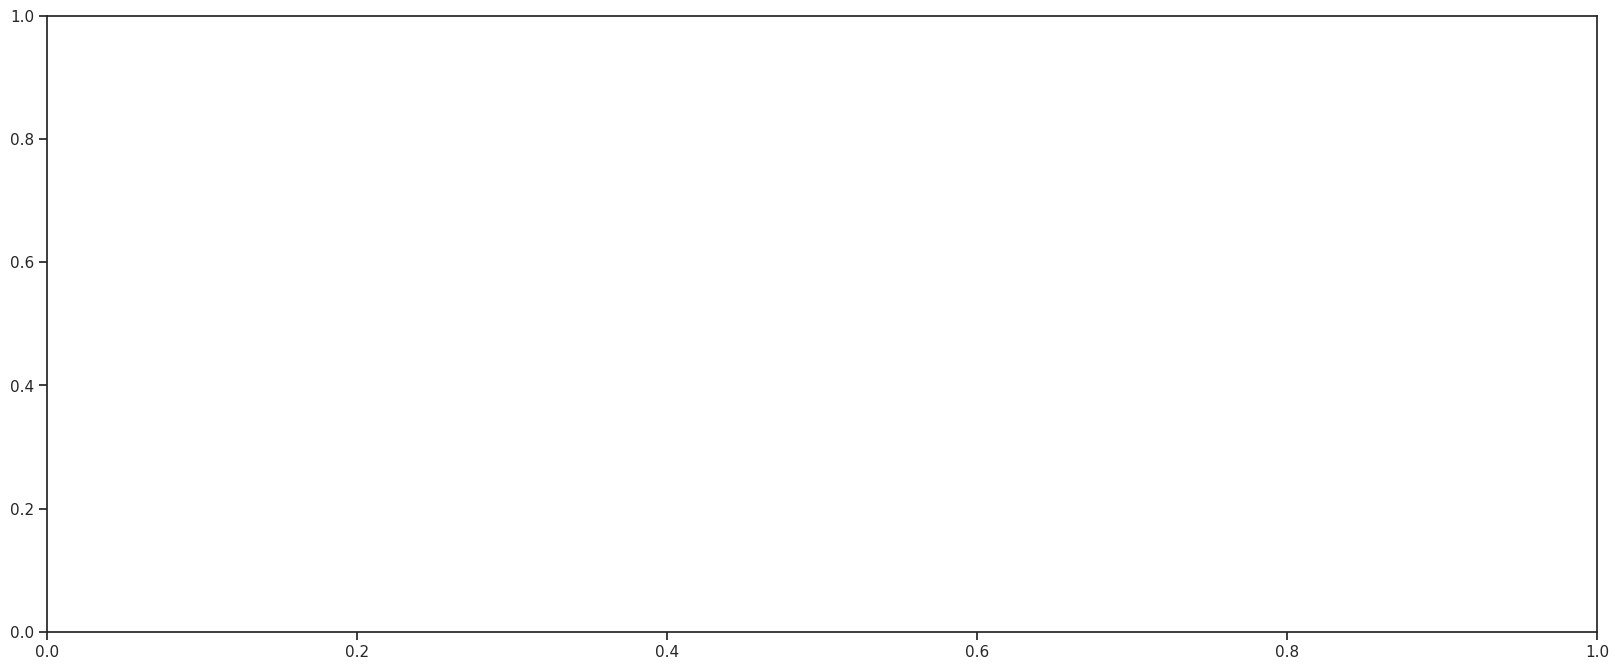

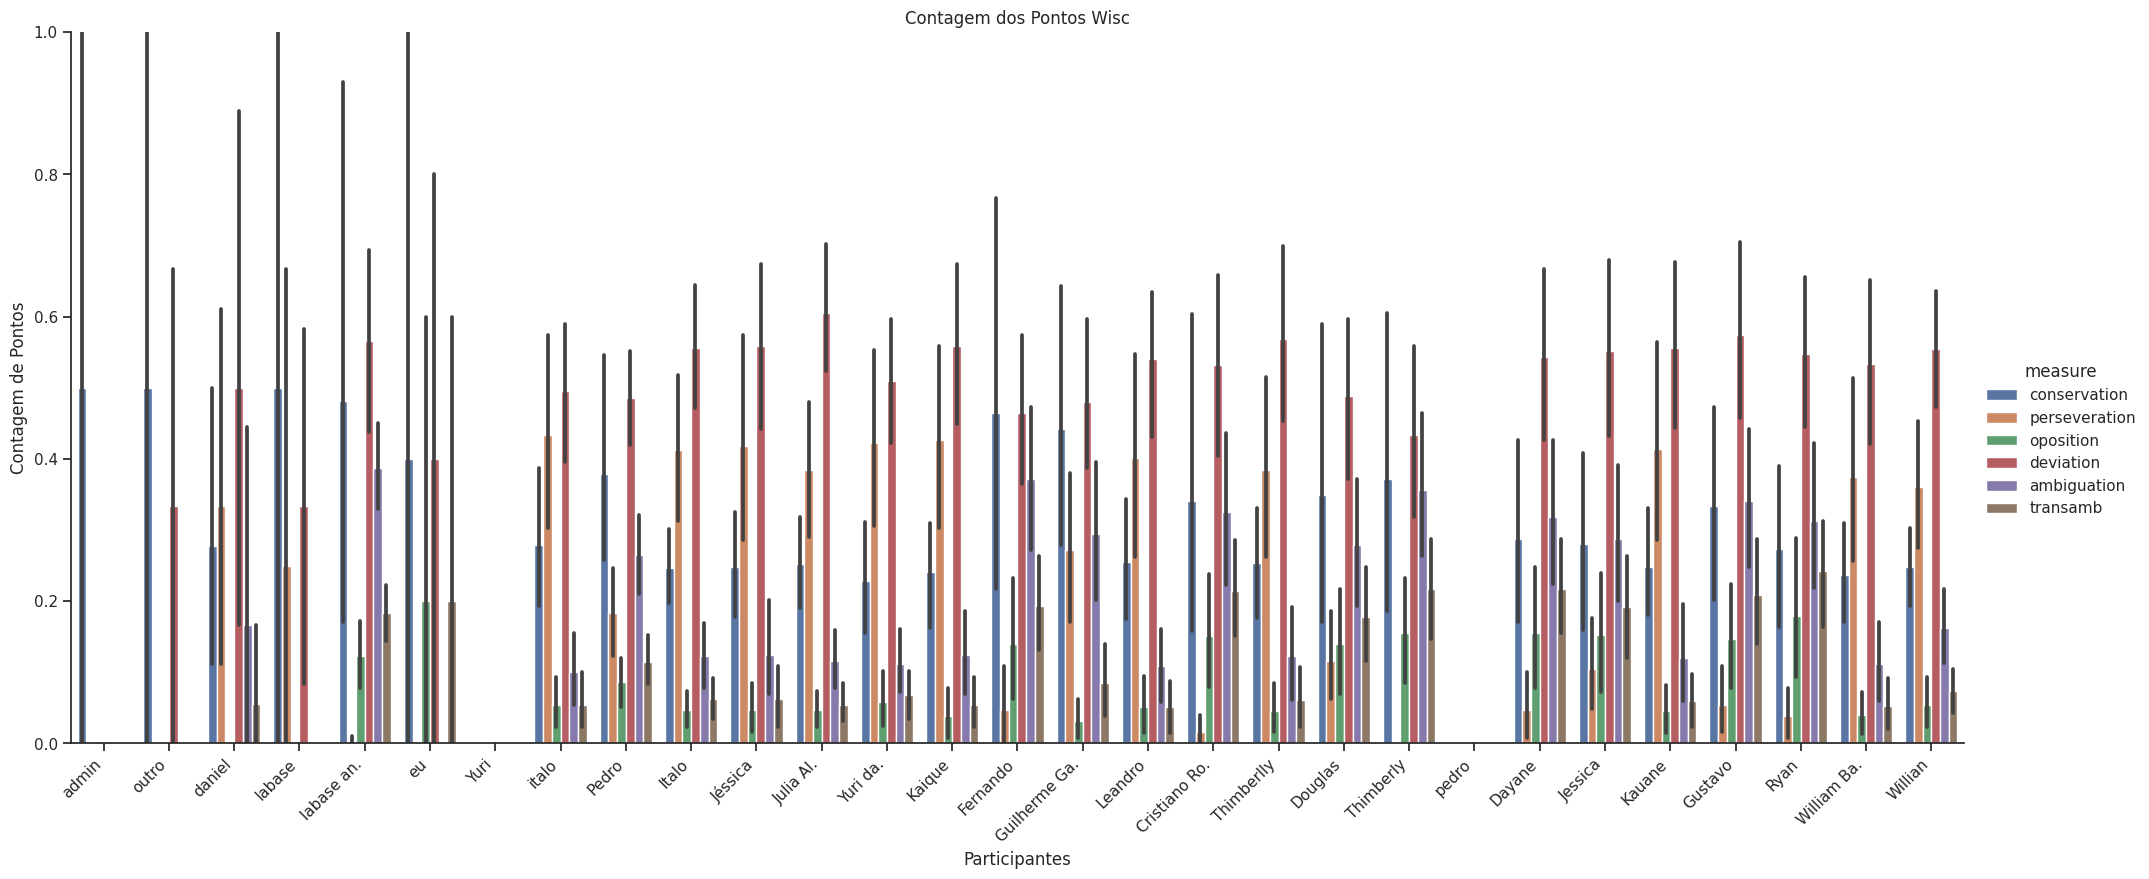

In [113]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
out = WiscPlot().retrieve_oid_from_person_df(df_players).factorplot(conf)


### Gráfico de violino das medidas do Wiconsin

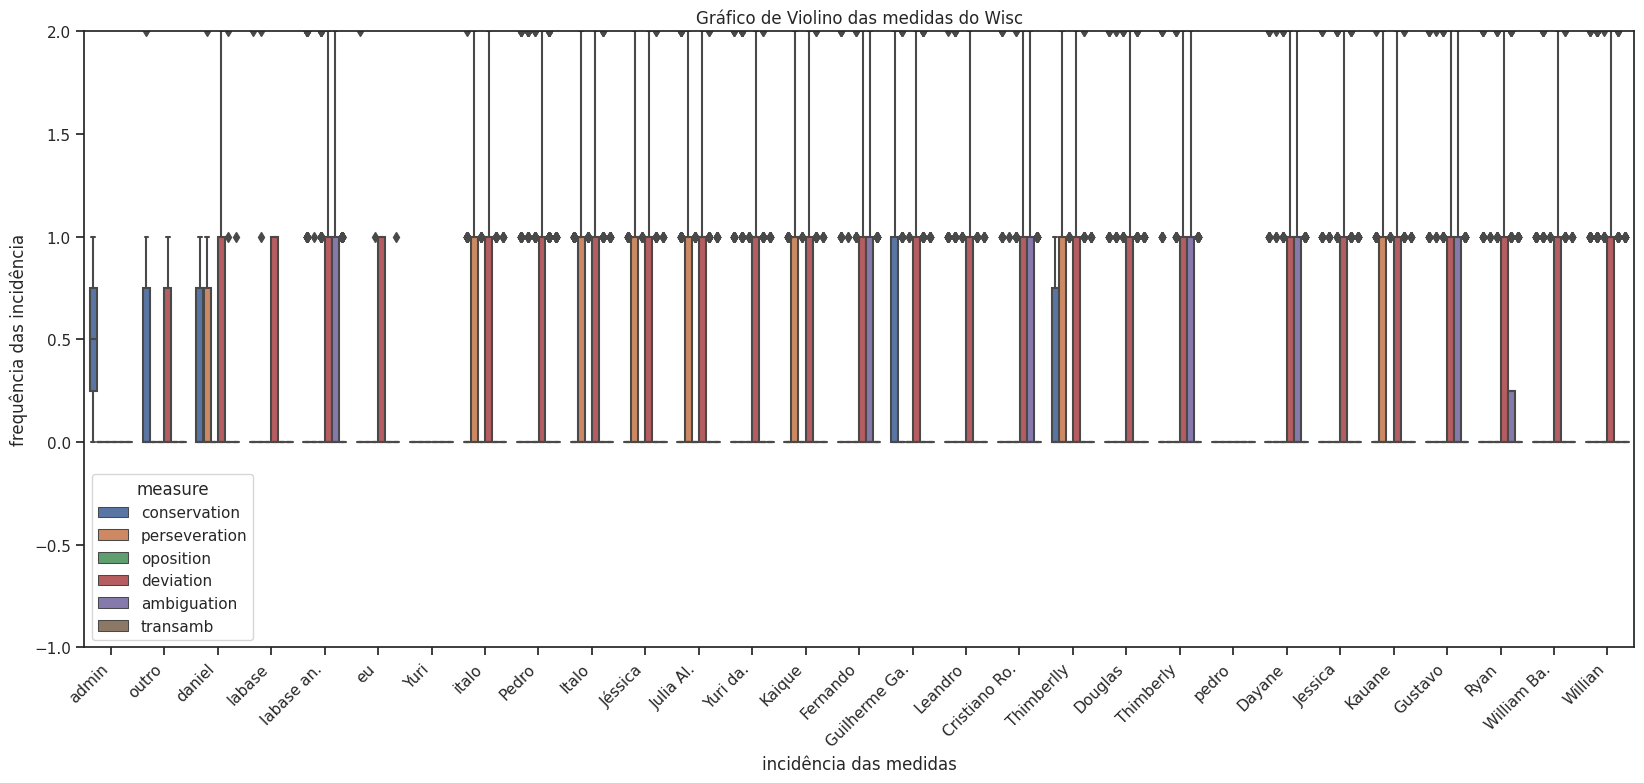

In [114]:
conf = WiscPlot.Cfplot(
    col='ponto', title='Gráfico de Violino das medidas do Wisc', ylabel='frequência das incidência',
    xlabel="incidência das medidas")
out = WiscPlot().retrieve_oid_from_person_df(df_players).violinplot(conf)


### Histograma das medidas do Wiconsin

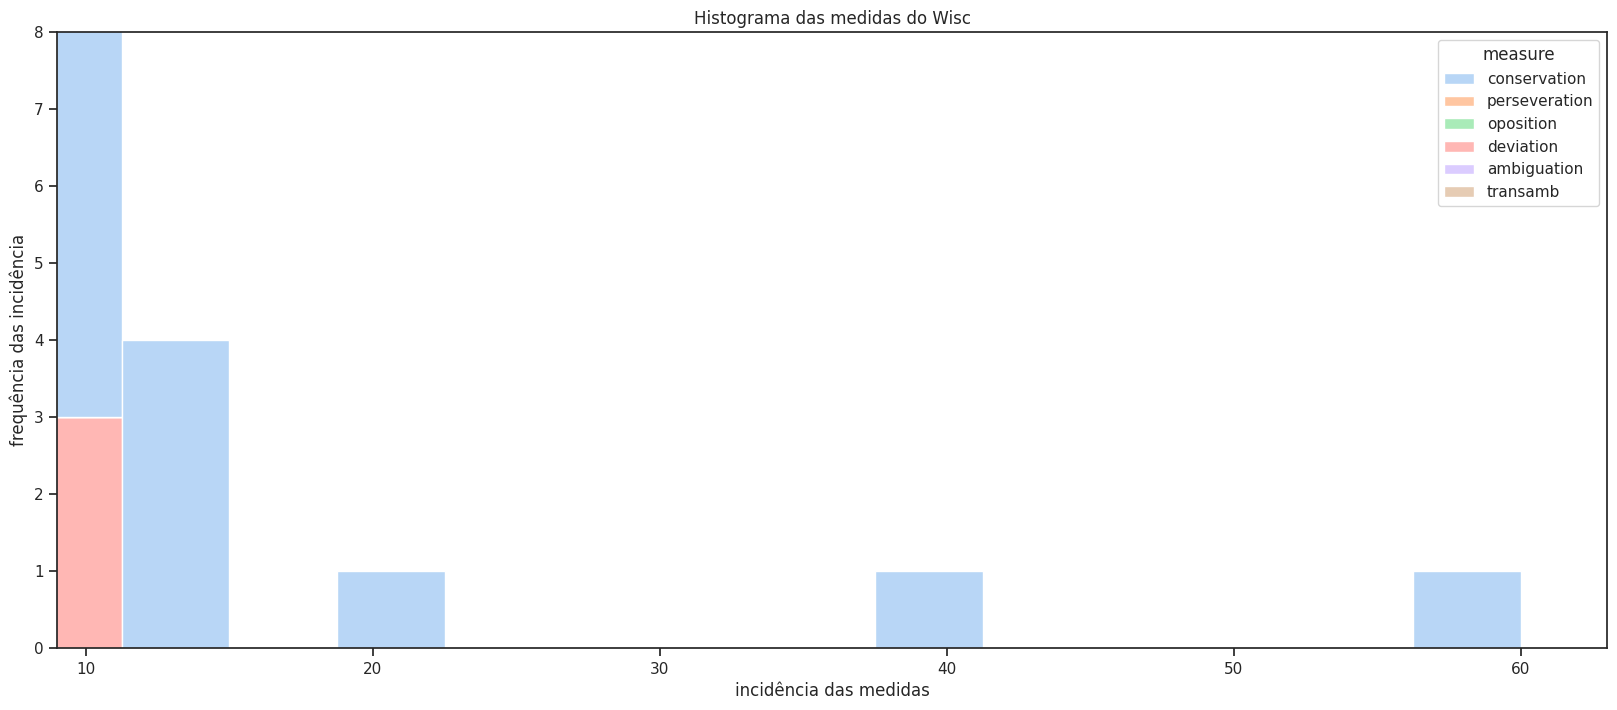

In [115]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Histograma das medidas do Wisc', ylabel='frequência das incidência', xlabel="incidência das medidas")
out = WiscPlot().retrieve_oid_from_person_df(df_players).histplot(conf)


### Correlação das medidas do Wiconsin

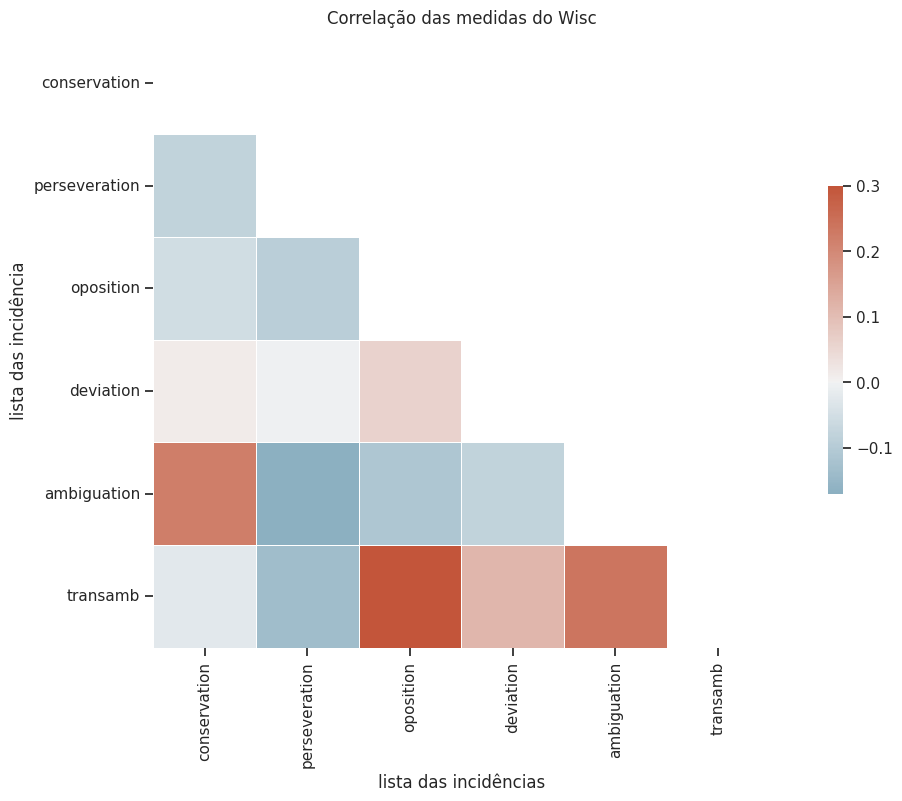

In [116]:
conf = WiscPlot.Cfplot(
     col='ponto', title='Correlação das medidas do Wisc', ylabel='lista das incidência', xlabel="lista das incidências")
out = WiscPlot().retrieve_oid_from_person_df(df_players).heatmap(conf)


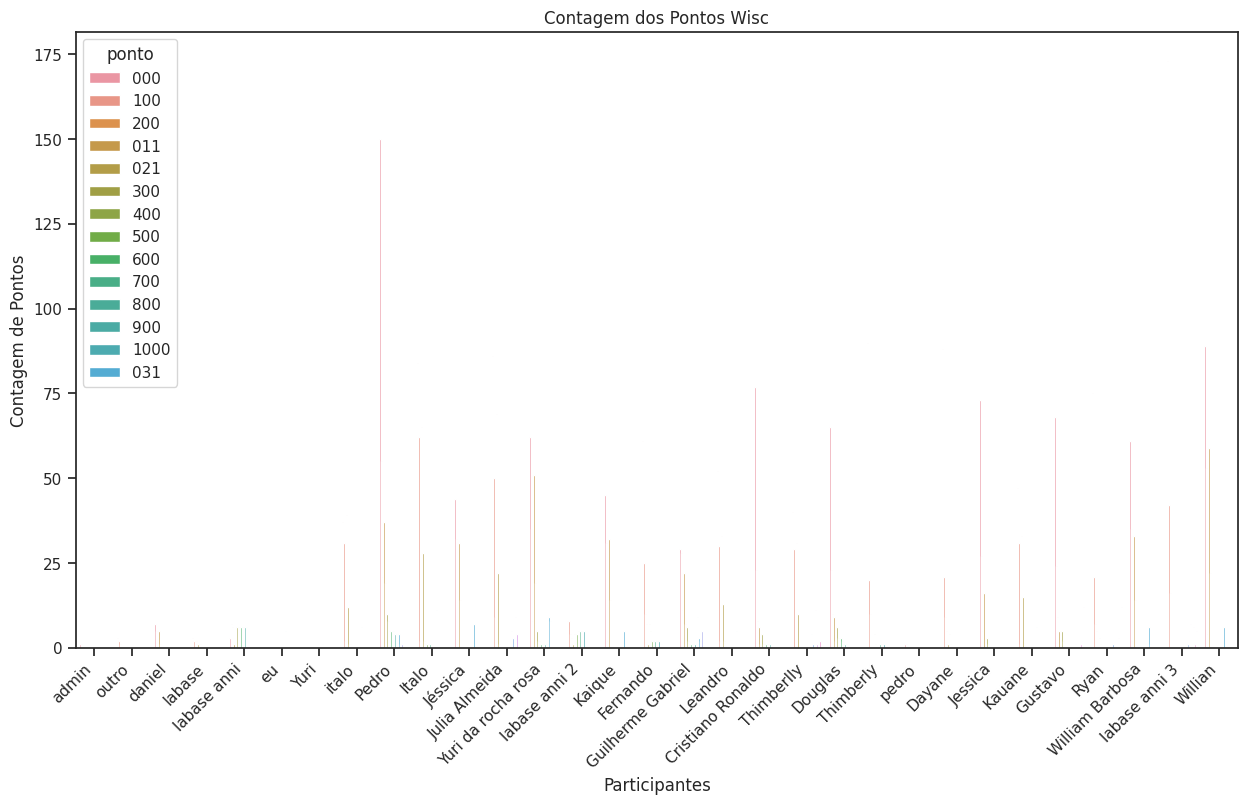

In [117]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfwc, x="name", hue="ponto")
_ = chart.set(title='Contagem dos Pontos Wisc', ylabel='Contagem de Pontos', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Gráfico de distribuição dos pontos no Eica

<Figure size 1500x800 with 0 Axes>

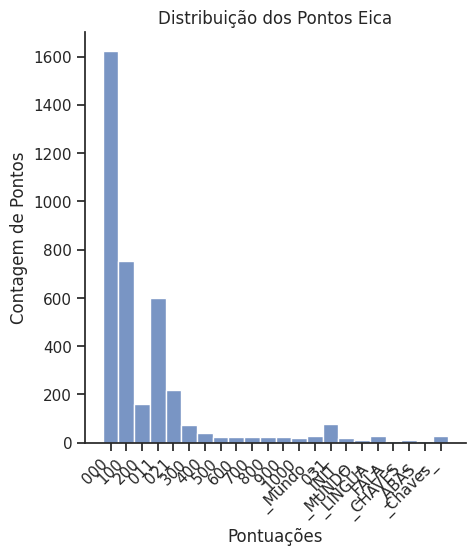

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt
xal = dict(_Mundo_=-10, _INIT_=15, _MUNDO_=-20, _LINGUA_=-30, _FALA_=-40, _CHAVES_=-50, _ABAS_=-60, _Chaves_=-70)
clean_ponto = [xal[x] if x in xal else x  for x in dfwc.ponto]
pd.to_numeric(clean_ponto)
_ = plt.figure(figsize=(15,8))
chart = sns.displot(data=dfwc, x="ponto")
_ = chart.set(title='Distribuição dos Pontos Eica', ylabel='Contagem de Pontos', xlabel="Pontuações")
_ = chart.set_xticklabels(rotation=45, horizontalalignment='right')

## Gráfico da distribuição dos valores no Eica

<Figure size 1500x800 with 0 Axes>

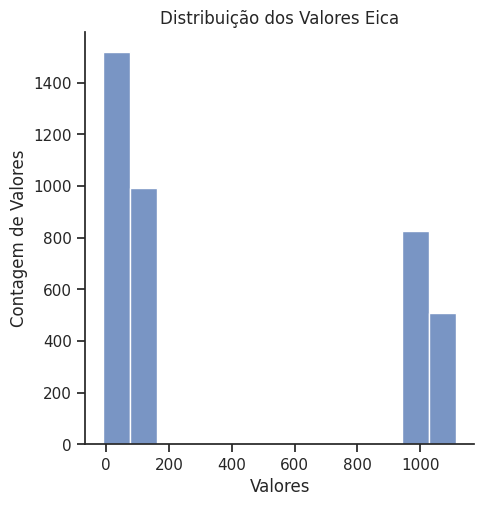

In [119]:
import seaborn as sns
from matplotlib import pyplot as plt
dfwe = dfwc.copy()
# xal = dict(_Mundo_=-10, _INIT_=15, _MUNDO_=-20, _LINGUA_=-30, _FALA_=-40, _CHAVES_=-50, _ABAS_=-60, _Chaves_=-70)
# clean_ponto = [xal[x] if x in xal else x  for x in dfwc.ponto]
# pd.to_numeric(clean_ponto)
xal = dict(minitens=-10, _INIT_=15, _MUNDO_=-20, _LINGUA_=-30, _FALA_=-40, _CHAVES_=-50, _ABAS_=-60, _Chaves_=-70)
clean_value = [-10  if type(x) != int else x for x in dfwc.valor]
dfwe.loc[:,"valor"] = dfwe.valor.apply(lambda x: -10  if type(x) != str or not x.isdigit() else int(x))
# pd.to_numeric(clean_value)
_ = plt.figure(figsize=(15,8))
chart = sns.displot(data=dfwe, x="valor")
_ = chart.set(title='Distribuição dos Valores Eica', ylabel='Contagem de Valores', xlabel="Valores")

## Gráfico da correlação entre pontos e valores no Wisc

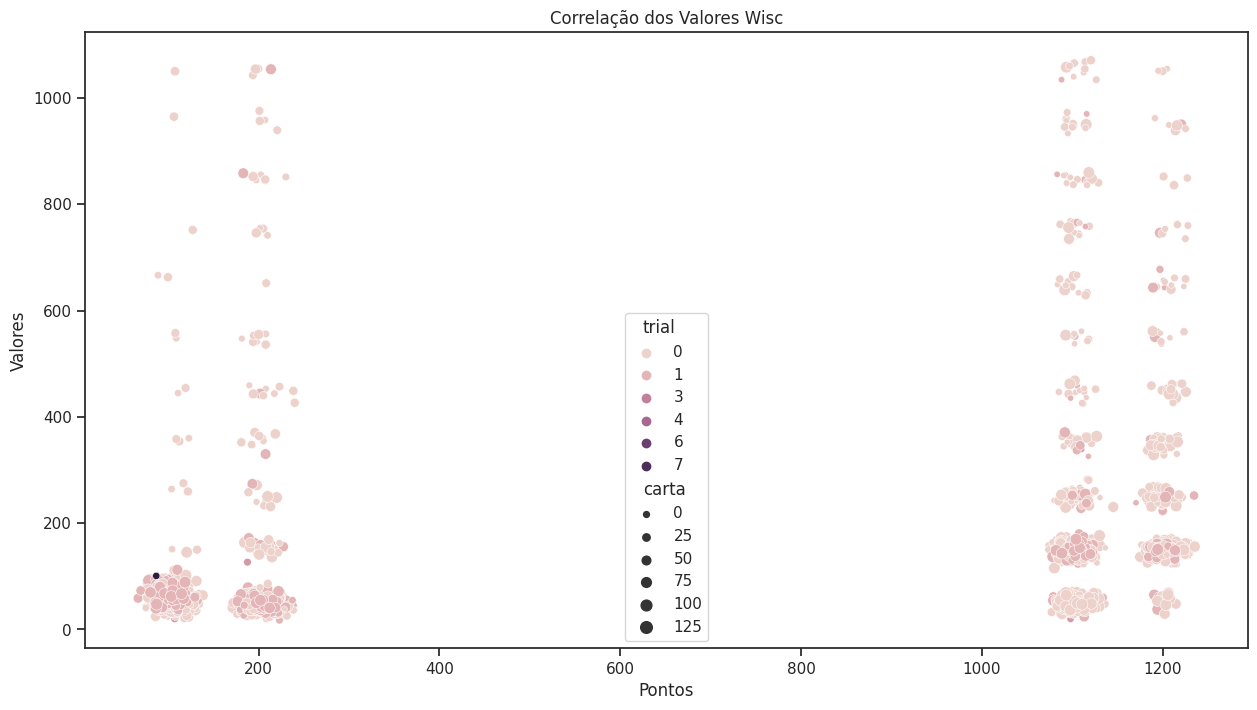

In [122]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def jitter(values,j):
    return values + np.random.normal(j,10,values.shape)
cols = ['valor', 'ponto', 'carta']
dfwj = dfwe.copy()
dfwj.loc[:, cols] = dfwj[cols].apply(pd.to_numeric, errors='coerce', axis=1)
# dfwc["ponto"] = pd.to_numeric(dfwc.ponto)
# pd.to_numeric(dfwc.valor)
_ = plt.figure(figsize=(15,8))
chart = sns.scatterplot(data=dfwj, x=jitter(dfwj.valor, 100), y=jitter(dfwj.ponto, 50), size="carta", hue="trial")
_ = chart.set(title='Correlação dos Valores Wisc', ylabel='Valores', xlabel="Pontos")

## Gráfico da contagem de valores do Wisc

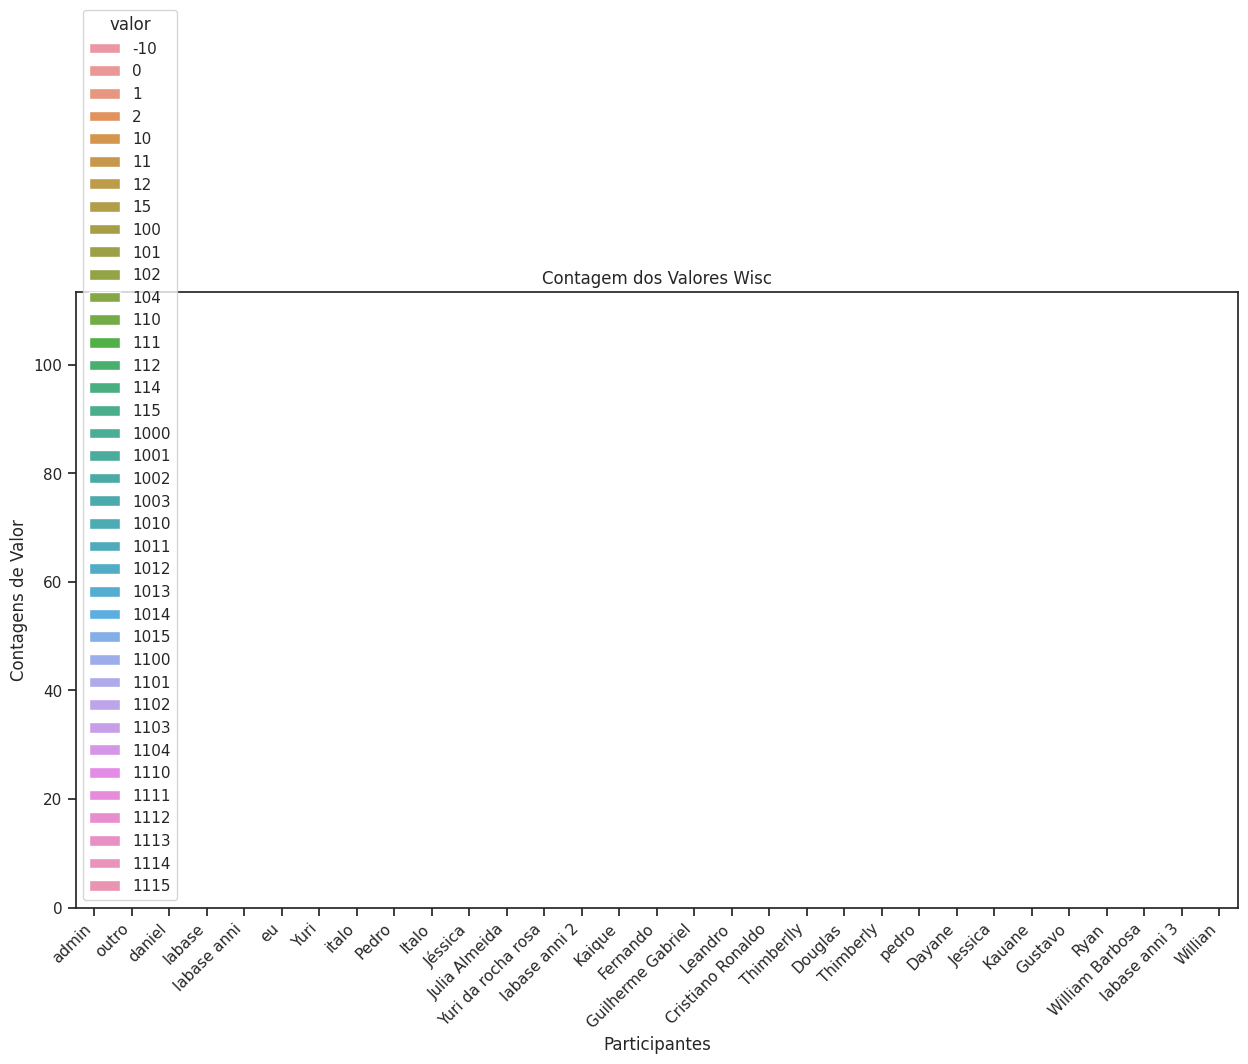

In [140]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfwe, x="name", hue="valor")
_ = chart.set(title='Contagem dos Valores Wisc', ylabel='Contagens de Valor', xlabel="Participantes")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Limpeza dos nomes dos valores de carta e ponto no EICA

In [123]:
dfei = dfa.loc[dfa['game'] == 'game']
dfei.loc[:,'carta'] = [re.findall(r"__(.+?)__",text)[0] if type(text) == str and text.startswith('_') else text for text in dfei.carta.to_list()]
dfei.loc[:,'ponto'] = [re.findall(r"_(.+?)_",text)[0] if type(text) == str and text.startswith('_') else text for text in dfei.ponto.to_list()]

dfei

index                                   _id     name  game  goal  \
2          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
3          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
4          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
5          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
6          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
...      ...                                   ...      ...   ...   ...   
11746    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11747    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11748    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11749    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11750    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   

       trial      carta                   casa                    move  \
2          0    I_N_I_T                    0_0                      ok   
3          0  A_T_I_V_A                    0_0                      ok   
4          0   minitens                400_520                      ok   
5          0          6                420_160                      ok   
6          0  A_T_I_V_A                    0_0                      ok   
...      ...        ...                    ...                     ...   
11746      0         20   Três Cruzes Amarelas      Um Círculo Amarelo   
11747      0         21   Duas Estrelas Verdes     Duas Estrelas Azuis   
11748      0         22   Três Cruzes Amarelas      Três Cruzes Verdes   
11749      0         23   Duas Estrelas Verdes  Duas Estrelas Amarelas   
11750      0         24  Quatro Círculos Azuis   Três Triângulos Azuis   

        ponto     valor                        time  
2        INIT      True  2023-05-31 19:49:01.943000  
3      CHAVES      True  2023-05-31 19:49:08.206000  
4        ABAS  minitens  2023-05-31 19:49:11.043999  
5      Chaves      True  2023-05-31 19:49:13.635999  
6      CHAVES     False  2023-05-31 19:49:16.654000  
...       ...       ...                         ...  
11746     100      1000  2023-07-11 14:05:16.614000  
11747     000      0110  2023-07-11 14:05:19.321000  
11748     000      0110  2023-07-11 14:05:21.652000  
11749     000      0110  2023-07-11 14:05:23.648000  
11750     100      1000  2023-07-11 14:05:28.428000  

[8160 rows x 12 columns]

## Gráfico de contagem de pontos EICA

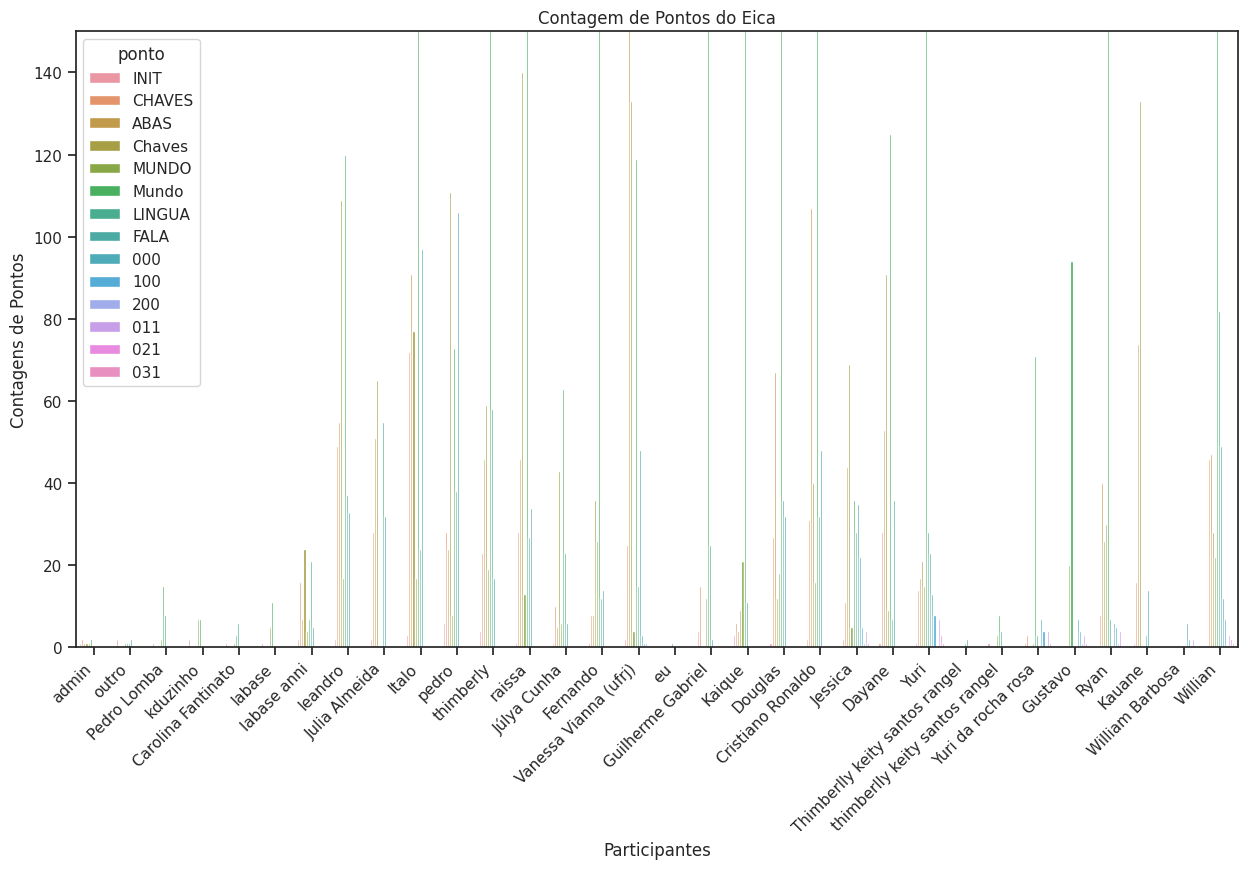

In [134]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
chart = sns.countplot(data=dfei, x="name", hue="ponto")
_ = chart.set(title='Contagem de Pontos do Eica', ylabel='Contagens de Pontos', xlabel="Participantes", ylim=(0,150))
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Gráfico de contagem de cartas do EICA

       index                                   _id     name  game  goal  \
2          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
3          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
4          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
5          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
6          1  ObjectId('6477ce20f626d3cb95e08c8f')    admin  game     0   
...      ...                                   ...      ...   ...   ...   
11746    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11747    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11748    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11749    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   
11750    141  ObjectId('64ad8285b23753d1d92bcc02')  Willian  game     0   

       trial carta                   casa                    move   ponto  \
2          0     I    

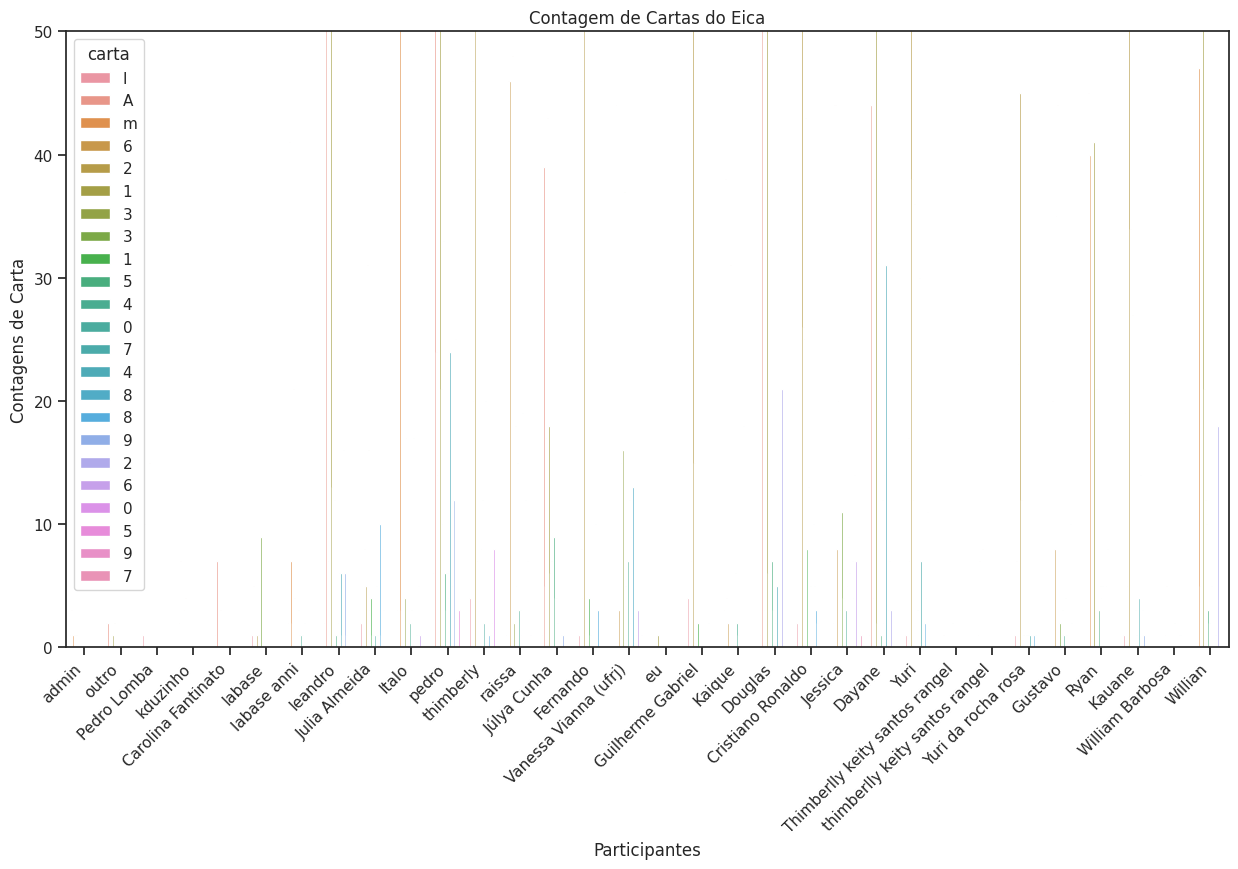

In [139]:
import seaborn as sns
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(15,8))
dfel = dfei.copy()
dfel.loc[:,"carta"] = dfel.carta.apply(lambda x: int(x[0]) if type(x) == str and len(x.split("_")) == 3 else str(x)[0])
print(dfel)
chart = sns.countplot(data=dfel, x="name", hue="carta")
_ = chart.set(title='Contagem de Cartas do Eica', ylabel='Contagens de Carta', xlabel="Participantes", ylim=(0,50))
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')